## Tabla de contenidos
* [Descripción del caso](#scrollTo=ibfgCNe68mgT)
    * [Inicialización](#scrollTo=3K-O70p18mgY)

* [1. Tratar los valores ausentes](#scrollTo=jw9SHFQW8mgi&line=1&uniqifier=1)
    * [Columna `is_4wd`](#scrollTo=s9j4T7upln1O&line=1&uniqifier=1)
    * [Columna `cylinders`](#scrollTo=P73L8rhsHHQt&line=1&uniqifier=1)
    * [Columna `model_year`](#scrollTo=EeWkFaHMzmFS&line=1&uniqifier=1)
    * [Columna `odometer`](#scrollTo=4uAPCk9izmFW&line=1&uniqifier=1)
    * [Columna `paint_color`](#scrollTo=4FuH1f9UzmFd&line=3&uniqifier=1)

* [2. Corregir los tipos datos](#scrollTo=QtGvSlLfzmFd&line=1&uniqifier=1)
    * [Columna `is_4wd`](#scrollTo=qaMUXDmEzmFd&line=1&uniqifier=1)
    * [Columna `date_posted`](#scrollTo=gPRtDe2SaSpH&line=1&uniqifier=1)
    * [Columna `type`](#scrollTo=K0U-ZkGPzmFe&line=1&uniqifier=1)
    * [Columna `cylinders`](#scrollTo=LoH33-H6zmFf&line=1&uniqifier=1)

* [3. Enriquecer datos](#scrollTo=kpiJ1C5zzmFg&line=1&uniqifier=1)
    * [Columnas para el día, mes y año](#scrollTo=0gFMlKzQccM-&line=1&uniqifier=1)
    * [Columnas para los años del vehículo](#scrollTo=Mo7MHF6rzmFh&line=1&uniqifier=1)
    * [Columna millaje promedio del vehículo por año](#scrollTo=EYzNEN_AzmFh&line=1&uniqifier=1)
    * [Reemplazar valores en la columna `condition`](#scrollTo=z-K_VrHOzmFk&line=1&uniqifier=1)

* [4. Comprobar datos limpios](#scrollTo=Dl071dnezmFk&line=1&uniqifier=1)
* [5. Estudiar parámetros principales](#scrollTo=oiHgqCYjzmFk&line=1&uniqifier=1)
* [6. Estudiar y tratar valores atípicos](#scrollTo=agO_Hso5zmFm&line=1&uniqifier=1)
    * [Columna `price`](#scrollTo=OmzOPHVzzmFm&line=1&uniqifier=1)
    * [Columna `car_age`](#scrollTo=j7KPvOctmXXg&line=1&uniqifier=1)
    * [Columna `odometer`](#scrollTo=DjxSQfLmmpQp&line=1&uniqifier=1)
    * [Concluciones y nuevo dataframe](#scrollTo=MdMPN4VAnj4N&line=1&uniqifier=1)
* [7. Estudiar parámetros principales sin valores atípicos](#scrollTo=WHoY89ThzmFr&line=1&uniqifier=1)
* [8. Período de colocación de los anuncios](#scrollTo=hYaSQGWczmFt&line=1&uniqifier=1)
* [9. Precio promedio por cada tipo de vehículo](#scrollTo=iqQuFmUbzmFv&line=1&uniqifier=1)
* [10. Factores de precio](#scrollTo=B9ir3NYRzmFx&line=1&uniqifier=1)
    * [SUV](#scrollTo=0_7Va26czmFx&line=1&uniqifier=1)
    * [Sedan](#scrollTo=14fCA1geqafN&line=1&uniqifier=1)
* [Conclusión general](#scrollTo=4thI_-ZazmF4)

#Descripción del caso

##¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [ ]:
# Cargar todas las librerías
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Cargando drive, ya que el proyecto fue realizado en Google Colab y el archivo se encuentra en Google Drive
from google.colab import drive
drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Cargar datos

In [ ]:
# Carga el archivo de datos en un DataFrame
try:
  #leyendo mi archivo que se encuentra en Google Drive
  car_data = pd.read_csv("gdrive/My Drive/Education/Practicum/Sprint 3/Project 3/vehicles_us.csv")
except:
  #leyendo el archivo para el revisor de código de Practicum
  car_data = pd.read_csv("/datasets/vehicles_us.csv")


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

[Al comprender los campos, explóralos para familiarizarte con los datos.]

In [ ]:
# imprime la información general/resumida sobre el DataFrame
car_data.shape


(51525, 13)

In [ ]:
# imprimir una muestra de datos
car_data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
car_data.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


### Conclusiones y siguientes pasos

En nuestro dataframe de anuncios de venta de vehículos hay 51525 filas y 13 columnas. Hay valores ausentes en cinco columnas: `model_year`, `cylinders`, `odometer`, `paint_color` e `is_4wd`. Es necesario analizar más a fondo estos valores para encontrar si existe un patrón subyacente en los mismos. La columna `is_4wd` parece contener solo valores NaN o 1. Además, la columna `type` contiene letras mayúsculas y minúsculas, lo que no sigue las normas de buen estilo. Por lo tanto, se realizarán cambios pertinentes a esta columna. También hay valores con decimales en las columnas `model_year` e `is_4wd`, por lo que se llamará al método `info()` para averiguar si se encuentran en tipo float.

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Al revisar la información general de nuestro dataframe se confirma la presencia de valores ausentes en cinco de las trece columnas de nuestra base de datos. La columna `is_4wd` presenta solo el 49% de sus valores, los cuales parecen estar relacionados con aquellos autos sin tracción en las cuatro ruedas. Los valores de la columna `model_year` e `is_4wd` son de tipo float. En el primer caso será necesario realizar un cambio del tipo de dato a entero, y en el caso de la columna `is_4wd`será necesario hacer un análisis a fondo de los valores únicos de ésta columna, ya que al parecer solo encontramos dos tipos de valores 1 o NaN. En base a esto se decidirá como imputar estos valores. La columna `date_posted` contiene fechas de tipo objeto, lo más lógico sería transformar estos valores en tipo datetime.

Considerando que la columna `is_4wd` podría ser categórica y que la columna `cylinders` también presentaría valores categóricos de acuerdo al número de cilindros, vamos a llamar al método unique a las variables categóricas de nuestro dataframe y comprobar si nuestra teoría es cierta.

In [ ]:
car_data_categorical = car_data[['model', 'condition', 'cylinders', 'fuel', 'transmission', 'type', 'paint_color', 'is_4wd']]

for column in car_data_categorical:
    print(car_data_categorical[column].unique())

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

Al aplicar el método unique a las columnas categóricas se puede verificar que tanto `cylinders` como `is_4wd` corresponden a variables categóricas. La columna con el tipo de tracción solo posee dos valores únicos, siendo 1 para autos con tracción 4x4 y NaN para aquellos que no poseen este tipo de tracción. Será necesario rellenar los valores NaN y luego transformar este tipo de datos en valores más apropiados, por ejemplo del tipo booleano. Luego se analizarán las variables numéricas del dataframe llamando al método describe.

In [ ]:
car_data_numerical = car_data[['price', 'model_year', 'odometer', 'days_listed']]
car_data_numerical.describe()

,price,model_year,odometer,days_listed
count,51525.000000,47906.000000,43633.000000,51525.00000
mean,12132.464920,2009.750470,115553.461738,39.55476
std,10040.803015,6.282065,65094.611341,28.20427
min,1.000000,1908.000000,0.000000,0.00000
25%,5000.000000,2006.000000,70000.000000,19.00000
50%,9000.000000,2011.000000,113000.000000,33.00000
75%,16839.000000,2014.000000,155000.000000,53.00000
max,375000.000000,2019.000000,990000.000000,271.00000


El método `describe` de Pandas es una función que genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN. En el caso de las columnas numéricas, al llamar al método describe nos encontramos que las columnas `price` y `odometer` presentan una desviación estándar alta¹. En el caso de la columna `price`, el valor mínimo registrado es de 1, lo que nos lleva a preguntarnos si existen valores atípicos que están generando anomalías en nuestro dataframe. Mientras que en el caso de la columna `odometer` la alta desviación estándar puede estar relacionada a autos nuevos con un millaje de 0 o autos antiguos con millajes de hasta 990000 millas.

Para establecer el número de valores ausentes para cada columna se puede llamar al método `isna` y `sum`.



In [ ]:
car_data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

La mitad de valores en la columna `is_4wd` están ausentes, lo que confirma nuestra teoría de que estos datos están relacionados con aquellos autos sin tracción 4x4.

Para poder encontrar patrones en los valores ausentes, vamos a utilizar dos bucles for que iteren sobre cada columna del dataframe y obtengan la frecuencia de valores únicos en cada una. Luego compararemos las distribuciones entre tres dataframes con valores ausentes, sin valores ausentes y con sólo valores ausentes, si observamos cambios en los porcentajes de distribución, entonces nuestros valores NaN estarán relacionados con una de nuestras variables.

Sabemos que los valores ausentes de la columna `is_4wd` están relacionados con aquellos autos sin tracción en las cuatro llantas, así que para este análisis crearemos un dataframe sin esta columna `car_data_2`. La razón para obviar esta columna es debido a que perderemos más del 50% de datos, lo que va a generar cambios evidentes en la distribución de nuestras variables y además sabemos que estos valores ausentes están relacionados con un error al categorizas los datos por lo que no están relacionados con un patrón subyacente.

In [ ]:
#Crear el nuevo dataframe para el análisis
car_data_2=car_data.loc[:, car_data.columns != 'is_4wd']

Con el nuevo dataframe vamos a comparar los recuentos de valores únicos del dataframe completo con valores ausentes, sin valores ausentes `car_data_without_nan` y con solo valores ausentes `car_data_only_nan`.

In [ ]:
for columns in car_data_2:
  print(car_data_2[columns].value_counts(dropna=False, normalize=True))

1        0.015488
6995     0.013954
5995     0.012712
4995     0.012111
3500     0.012033
           ...   
58500    0.000019
3993     0.000019
32987    0.000019
3744     0.000019
7455     0.000019
Name: price, Length: 3443, dtype: float64
NaN       0.070238
2013.0    0.068879
2012.0    0.067307
2014.0    0.066919
2011.0    0.065502
            ...   
1948.0    0.000019
1961.0    0.000019
1936.0    0.000019
1949.0    0.000019
1929.0    0.000019
Name: model_year, Length: 69, dtype: float64
ford f-150                           0.054265
chevrolet silverado 1500             0.042135
ram 1500                             0.033964
chevrolet silverado                  0.024668
jeep wrangler                        0.021718
                                       ...   
ford f-250 super duty                0.004677
acura tl                             0.004580
kia sorento                          0.004580
nissan murano                        0.004561
mercedes-benz benze sprinter 2500    0.000796


In [ ]:
#crear el nuevo daataframe pero sin valores nulos
car_data_without_nan =  car_data_2.dropna()

In [ ]:
for columns in car_data_without_nan:
    print(car_data_without_nan[columns].value_counts(normalize=True))

1        0.015544
6995     0.014173
5995     0.013571
3500     0.012201
4500     0.012101
           ...   
42970    0.000033
39608    0.000033
23976    0.000033
18958    0.000033
7455     0.000033
Name: price, Length: 2704, dtype: float64
2013.0    0.072637
2012.0    0.072269
2011.0    0.071366
2014.0    0.071333
2015.0    0.068793
            ...   
1948.0    0.000033
1908.0    0.000033
1961.0    0.000033
1936.0    0.000033
1958.0    0.000033
Name: model_year, Length: 65, dtype: float64
ford f-150                  0.055322
chevrolet silverado 1500    0.042018
ram 1500                    0.033828
chevrolet silverado         0.024903
jeep wrangler               0.020992
                              ...   
kia sorento                 0.004713
chrysler 200                0.004613
ford f-250 super duty       0.004312
acura tl                    0.004279
nissan murano               0.004145
Name: model, Length: 99, dtype: float64
excellent    0.480044
good         0.391128
like new     0.

In [ ]:
car_data_only_nan = car_data_2[car_data_2.isna().any(1)]

<ipython-input-180-36df7e4d9f23>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  car_data_only_nan = car_data_2[car_data_2.isna().any(1)]


In [ ]:
for columns in car_data_only_nan:
    print(car_data_only_nan[columns].value_counts(normalize=True))

1        0.015410
6995     0.013652
4995     0.012449
7995     0.012125
3500     0.011801
           ...   
61361    0.000046
8979     0.000046
21700    0.000046
64850    0.000046
3636     0.000046
Name: price, Length: 2331, dtype: float64
2013.0    0.076487
2014.0    0.073041
2012.0    0.072596
2015.0    0.070317
2011.0    0.068927
            ...   
1908.0    0.000056
1962.0    0.000056
1949.0    0.000056
1929.0    0.000056
1958.0    0.000056
Name: model_year, Length: 64, dtype: float64
ford f-150                           0.052802
chevrolet silverado 1500             0.042297
ram 1500                             0.034152
chevrolet silverado                  0.024342
jeep wrangler                        0.022722
                                       ...   
ford f350 super duty                 0.004535
kia sorento                          0.004396
dodge dakota                         0.004304
chevrolet silverado 3500hd           0.004257
mercedes-benz benze sprinter 2500    0.001897


### Conclusiones y siguientes pasos
Cinco de las trece columnas del dataframe presentan valores ausentes. La columna `is_4wd` presenta el porcentaje más alto de valores NaN (50%), pero se pudo corroborar que estos valores están relacionados al uso de valores 1 para categorizar autos con tracción en las cuatro ruedas, mientras que NaN se refiere a autos sin tracción 4x4. Es así que en esta columna será necesario rellenar los valores ausentes y cambiar a un tipo booleano (True/False), que permitirá una mejor distinción de éstas categorías.

En el caso de las columnas `model_year`, `cylinders`, `odometer` y `paint_color` no se encontraron variables que influyan en estos valores, por lo que se confirma su distribución aleatoria. Quizás al momento de ingresar información sobre el vehículo en nuestro sitio web, el vendedor olvidó rellenar estos valores. Será necesario buscar qué variables pueden ayudarnos a rellenar estos valores ausentes.

La columna `is_4wd` será cambiada a tipo booleano y también se cambiará a valores enteros la columna `model_year` que se presenta como tipo float. Así mismo, la columna `date_posted` presenta datos de tipo objeto, será necesario cambiarlos a tipo datetime para un correcto procesamiento de datos en los siguientes análisis.

# 1.Tratar los valores ausentes

## Columna `is_4wd`

In [ ]:
#Procedemos a revisar los valores de la columna `is_4wd`
car_data['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [ ]:
#Reeemplazar valores NaN de la columna "is_4wd" con el valor de 0
car_data['is_4wd'] = car_data['is_4wd'].fillna(0)

In [ ]:
#Comprobamos que ya no existan valores NaN en la columna "is_4wd"
car_data['is_4wd'].isna().sum()

0

In [ ]:
car_data['is_4wd'].value_counts(dropna=False)

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, completaste correctamente esta columna.
</div>

##Columna `cylinders`

La columna `cylinders` presenta un 10.26% de valores ausentes, para rellenar dichos valores consideraremos el modelo del auto; es decir, la variable`model`

In [ ]:
car_data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Se puede observar que no existe gran diferencia entre el valor de la media y la mediana. Para continuar con el tratamiento de valores ausentes, utilizaré el valor de la mediana, ya que el número de cilindros en un auto es un número entero.

In [ ]:
#Creamos un data slice sin valores ausentes en la columna "cylindres"
cylinders_without_nan = car_data.loc[~(car_data['cylinders'].isna())]
cylinders_without_nan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [ ]:
#Vamos a crear una tabla dinámica `cylinders_by_model`
cylinders_by_model = cylinders_without_nan.pivot_table(index='model', values= 'cylinders', aggfunc= 'median')
cylinders_by_model

,cylinders
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


In [ ]:
#Creamos una función para rellenar los valores ausentes en la columna "cylinders"
def fill_nan_cylinders(row):
    model = row['model']
    cylinders = row['cylinders']

    if pd.isna(cylinders):
        return cylinders_by_model.loc[model]['cylinders']
    return cylinders

La función llamada `fill_nan_cylinders` recibe una fila de un DataFrame como argumento. La función extrae el modelo y el número de cilindros de la fila y verifica si el número de cilindros es NaN (no es un número). Si es así, la función devuelve el número de cilindros más común para ese modelo en particular utilizando la variable `cylinders_by_model`. Si no es NaN, la función devuelve el número de cilindros que se encuentra en la fila.



In [ ]:
#Comprobamos si la función está trabajando correctamente,
#para esto utilizamos el valor nulo np.nan de la librería Numpy.
row_values = ['cadillac escalade', np.nan]
row_columns = ['model', 'cylinders']
row = pd.Series(data=row_values, index=row_columns)
fill_nan_cylinders(row)

8.0

In [ ]:
#Aplicamos la función a toda la columna "cylinders" del DataFrame
try:
    car_data['cylinders'] = car_data.apply(fill_nan_cylinders, axis = 1)
except:
    print('Function Error')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Definiste correctamente la función y usaste bien el apply para completar los datos.
</div>

In [ ]:
#Verificamos que no existan valores ausentes
car_data['cylinders'].isna().sum()

0

##Columna `model_year`

La columna `model_year` presenta un 7% de valores ausentes, para analizar más a fondo cómo se comportan los datos dentro de ésta columna, vamos a llamar al método describe.


In [ ]:
car_data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Aunque la desviación estándar es baja, se usará la mediana para rellenar valores faltantes debido a que trabajamos con valores de años, lo que permite un reemplazo más sencillo de los valores NaN con valores enteros. Se debe crear un data slice que excluya filas con valores faltantes de la columna "model_year" y se guardará en la variable "model_no_missing_values" antes de reemplazar los valores.

In [ ]:
car_data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

A pesar de la baja desviación estándar, se usará la mediana para reemplazar los valores faltantes en la columna de años. Se creará un data slice sin las filas con valores ausentes en la columna "model_year" y se guardará en la variable "model_no_missing_values" antes del reemplazo.

In [ ]:
model_no_missing_values = car_data.loc[~(car_data['model_year'].isna())]
model_no_missing_values.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


Antes de reemplazar los valores faltantes, consideraremos las variables que podrían influir en ellos, como el modelo del auto y su condición. Usaremos la mediana de los datos agrupados por modelo y condición para rellenar los valores ausentes en la columna `model_year`, lo que se logrará mediante la creación de una tabla dinámica llamada `model_condition`.

In [ ]:
model_condition = model_no_missing_values.pivot_table(index=['model', 'condition'], values='model_year', aggfunc = 'median')
model_condition.head(8)

model_year
model    condition            
acura tl excellent      2009.0
         fair           2004.0
         good           2007.0
         like new       2007.0
bmw x5   excellent      2010.0
         fair           2004.0
         good           2006.0
         like new       2009.0

Para rellenar los valores ausentes vamos a crear una función `fill_model_year` que llamará a los valores de medianas en la tabla `model_condition`, y los irá reemplazando cada vez que encuentre un valor ausente en la columna `model_year`.

In [ ]:
def fill_model_year(row):
    model = row['model']
    condition = row['condition']
    model_year = row['model_year']

    if pd.isna(model_year):
        return model_condition.loc[(model, condition), 'model_year']
    return model_year

Probaremos si la función está trabajando correctamente, aplicándola a los valores que se presentan a continuación. También utilizaremos np.nan para referirnos a los valores ausentes.

In [ ]:
row_values = ['acura tl', 'excellent', np.nan]
row_columns = ['model', 'condition', 'model_year']
row = pd.Series(data=row_values, index=row_columns)
fill_model_year(row)

2009.0

Vamos a aplicar la función a toda la columna `model_year`, para esto utilizaremos un bloque try-except, que devolverá 'Function Error' si encuentra valores que no pueden ser rellenados.

In [ ]:
try:
    car_data['model_year'] = car_data.apply(fill_model_year, axis = 1)
except:
    print('Function Error')

Function Error


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Muy bien! El try except capturo correctamente el error.
</div>

Gracias a nuestro bloque try-except se detectó un error al reemplazar valores ausentes en la columna `model_year`. Para saber que valores no están causando problemas, vamos a generar un bucle for que iterará por cada índice de nuestro dataframe y nos devolverá aquellos valores que no pueden ser rellenados a partir de nuestra función `fill_model_year`. Estos se guardarán en la lista list_index_model. Posteriormente utilizaremos el atributo index y el método isin para explorar los valores problemáticos.

In [ ]:
list_index_model = []

for i in range(len(car_data)):
    try:
        fill_model_year(car_data.iloc[i])
    except:
        list_index_model.append(i)

In [ ]:
car_data[car_data.index.isin(list_index_model)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,0.0,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,6.0,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


Como se puede observar son seis los valores problemáticos que no permiten el correcto funcionamiento de nuestra función. Al parecer solo existe un registro para este tipo de valores, por lo que no se ha generado su valor mediano correspondiente. Ya que esto valores representan solo el 0.011%, vamos a reemplazarlos con los valores de la mediana de la columna `model_year` pero sin valores ausentes `model_no_missing_values`. Llamamos nuevamente al atributo index y el método isin para comprobar que los valores han sido rellenados.

In [ ]:
median = model_no_missing_values['model_year'].median()
car_data.loc[list_index_model, 'model_year'] = median
car_data[car_data.index.isin(list_index_model)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,2011.0,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33
18125,15000,2011.0,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,2011.0,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,0.0,2019-03-28,107
21758,23000,2011.0,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,2011.0,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,2011.0,jeep wrangler,new,6.0,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


Una vez que los valores problemáticos fueron rellenados con la mediana, vamos a aplicar nuevamente la función a la columna `model_year`.

In [ ]:
try:
    car_data['model_year'] = car_data.apply(fill_model_year, axis = 1)
except:
    print('Function Error')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

La mediana fue buena opción para completar estos datos.
</div>

In [ ]:
car_data['model_year'].isna().sum()

0

Efectivamente no obtuvimos el mensaje de error al momento de aplicar la función y esto se corrobora al aplicar el método isna() y sum() que comprueban el reemplazo de todos los valores ausentes en la columns `model_year`. Sin embargo, al llamar al método unique, nos encontramos con valores decimales para el año del vehículo, por lo que decidimos aplicar el método astype con la opcion int a la columna `model_year`. Luego comprobamos llamando al método unique que no existen valores de coma flotante para el año del auto.

In [ ]:
car_data['model_year'].unique()

array([2011. , 2008. , 2013. , 2003. , 2017. , 2014. , 2015. , 2012. ,
       2018. , 2009. , 2010. , 2007. , 2004. , 2005. , 2001. , 2006. ,
       1966. , 1994. , 2019. , 2000. , 2016. , 1993. , 1999. , 1997. ,
       2002. , 1981. , 1995. , 1996. , 1975. , 1998. , 2012.5, 2001.5,
       1985. , 1977. , 1987. , 1974. , 1990. , 1992. , 1991. , 1972. ,
       1967. , 1988. , 1969. , 1989. , 1978. , 1965. , 1979. , 2005.5,
       1968. , 1986. , 1980. , 1964. , 1963. , 1984. , 1982. , 2002.5,
       1973. , 2006.5, 1970. , 1955. , 1971. , 2009.5, 1976. , 1983. ,
       2011.5, 1954. , 2016.5, 1962. , 1948. , 2014.5, 2010.5, 1960. ,
       2000.5, 1908. , 1961. , 1936. , 1949. , 2004.5, 1958. , 2003.5,
       1929. ])

In [ ]:
car_data['model_year'] = car_data['model_year'].astype('int')
car_data['model_year'].unique()

array([2011, 2008, 2013, 2003, 2017, 2014, 2015, 2012, 2018, 2009, 2010,
       2007, 2004, 2005, 2001, 2006, 1966, 1994, 2019, 2000, 2016, 1993,
       1999, 1997, 2002, 1981, 1995, 1996, 1975, 1998, 1985, 1977, 1987,
       1974, 1990, 1992, 1991, 1972, 1967, 1988, 1969, 1989, 1978, 1965,
       1979, 1968, 1986, 1980, 1964, 1963, 1984, 1982, 1973, 1970, 1955,
       1971, 1976, 1983, 1954, 1962, 1948, 1960, 1908, 1961, 1936, 1949,
       1958, 1929])

##Columna `odometer`

La columna `odometer` registró un 15% de valores ausentes, para rellenarlos vamos a llamar al método describe y observar cómo se comportan los datos de ésta columna.

In [ ]:
car_data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Si observamos los resultados del método describe para la columna odometer, nos encontramos con una desviación estándar relativamente alta. Así que decidimos rellenar los valores ausentes con la mediana, ya que al parecer existen valores atípicos en ésta columna.

Ahora decidiremos qué variables van a servir para rellenar los valores ausentes de la columna odometer. El recorrido en millas de un auto va a depender directamente de los años de uso, es así que a más años lo normal sería encontrar autos con un mayor millaje. Así mismo, va a depender del modelo, una camioneta Ford f-150 va a ser mayormente utilizada para trabajo pesado o trabajo en el campo, y puede llegar a recorrer más millas que un auto de la ciudad como un sedán.

Como los valores ausentes de la columna `model_year` ya fueron rellenados, vamos a generar una nueva columna `year_group`, la cual contendrá los rangos de años para cada auto. En primer lugar, crearemos la función `assing_year_group` que establecerá cinco rangos con intervalos de cuatro, siendo el límite inferior menor a 2003 y el límite superior mayor a 2015. Aplicaremos esta función a la nueva columna `year_group` y llamaremos a `value_counts` para comprobar que los valores fueron correctamente clasificados.

In [ ]:
def assing_year_group(year):
    if year < 2003:
        return '<2003'
    if year >= 2003  and year <= 2006:
        return '2003-2006'
    if year >= 2007  and year <= 2011:
        return '2007-2011'
    if year >= 2011  and year <= 2014:
        return '2011-2014'
    if year >= 2015:
        return '>2015'

In [ ]:
car_data['year_group'] = car_data['model_year'].apply(assing_year_group)
car_data['year_group'].value_counts(dropna=False)

2007-2011    15345
2011-2014    11666
>2015        11573
2003-2006     7795
<2003         5146
Name: year_group, dtype: int64

Una vez comprobado que la columna year_group ha sido correctamente clasificada, vamos a crear una variable que contenga un slice del dataframe sin valores ausentes en la columna `odometer` y lo guardaremos en la variable `odometer_no_missing_values`.

In [ ]:
odometer_no_missing_values = car_data.loc[~(car_data['odometer'].isna())]
odometer_no_missing_values.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2007-2011
1,25500,2008,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2007-2011
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2011-2014
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,>2015
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2011-2014


A partir de nuestro dataframe filtrado sin valores ausentes, vamos a generar una tabla dinámica `odometer_model_condition` que contenga las medianas por modelo de auto y el rango de años de la columna `year_group`.

In [ ]:
odometer_model_condition = odometer_no_missing_values.pivot_table(index=['model', 'year_group'], values='odometer', aggfunc='median')
odometer_model_condition.head(10)

odometer
model         year_group          
acura tl      2003-2006   166000.0
              2007-2011   139630.0
              2011-2014   100000.0
              <2003       184000.0
bmw x5        2003-2006   145831.0
              2007-2011   107570.0
              2011-2014    84497.0
              <2003       160073.0
              >2015        56000.0
buick enclave 2007-2011   137962.0

Ahora vamos a crear la función `fill_nan_odometer` que tomarán los valores medianos de la tabla dinámica `odometer_model_condition` y los utilizará para rellenar los valores ausentes de la columna odometer. Comprobaremos si la función está trabajando correctamente al llamar a la fila número tres de nuestra base de datos que presenta valores ausentes en la columna odometer y luego aplicaremos un bloque try-except para aplicar la función a la columna y reemplazar los valores, si la función no reemplaza los valores se lanzará el mensaje de error.

In [ ]:
def fill_nan_odometer(row):
    model = row['model']
    year_group = row['year_group']
    odometer = row['odometer']

    if pd.isna(odometer):
        return odometer_model_condition.loc[(model, year_group), 'odometer']
    return odometer

In [ ]:
fill_nan_odometer(car_data.iloc[3])

158000.0

In [ ]:
try:
    car_data['odometer'] = car_data.apply(fill_nan_odometer, axis = 1)
except:
    print('Function Error')

Function Error


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen trabajo.
</div>

Una vez aplicada nuestra función `fill_nan_odometer` se produjo un mensaje de error, así que aplicaremos un bucle for que itere por nuestro dataframe y devuelva los índices de las filas donde no se pudieron rellenar los valores, esto se almacenará en la lista list_index_odometer.

In [ ]:
list_index_odometer = []

for i in range(len(car_data)):
    try:
        fill_nan_odometer(car_data.iloc[i])
    except:
        list_index_odometer.append(i)


Al imprimir la lista de valores de nuestra lista list_index_odometer nos encontramos con el modelo 'Mercedes Benz benze sprinter 2500', al parecer no existen valores de referencia sobre el millaje de este modelo de auto, así que rellenaremos estos valores con la mediana de la columna odometer sin valores ausentes.

In [ ]:
car_data[car_data.index.isin(list_index_odometer)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16,2011-2014
1642,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36,2011-2014
2232,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70,2011-2014
2731,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-12,31,2011-2014
4149,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28,2011-2014
4681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-10-02,32,2011-2014
5681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-11,34,2011-2014
8975,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-09-24,45,2011-2014
10600,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-09-16,47,2011-2014
11541,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-05-28,24,2011-2014


In [ ]:
median = odometer_no_missing_values['odometer'].median()
car_data.loc[list_index_odometer, 'odometer'] = median
car_data[car_data.index.isin(list_index_odometer)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,black,0.0,2019-01-15,16,2011-2014
1642,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,black,0.0,2018-12-04,36,2011-2014
2232,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,black,0.0,2018-08-23,70,2011-2014
2731,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,black,0.0,2019-04-12,31,2011-2014
4149,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,black,0.0,2018-10-12,28,2011-2014
4681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,NaN,0.0,2018-10-02,32,2011-2014
5681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,black,0.0,2018-12-11,34,2011-2014
8975,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,NaN,0.0,2018-09-24,45,2011-2014
10600,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,black,0.0,2018-09-16,47,2011-2014
11541,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,113000.0,automatic,van,NaN,0.0,2018-05-28,24,2011-2014


Comprobamos que los valores hayan sido reemplazados correctamente llamando al método isin a los índices de la lista list_index. Efectivamente los valores han sido rellenados. Ahora aplicaremos nuevamente la función a nuestro dataframe y podemos observar que no se ha generado ningún mensaje de error, esto lo hacemos evidente al llamar al método isna y sum a la columna odometer y obtener un valor de 0.

In [ ]:
try:
    car_data['odometer'] = car_data.apply(fill_nan_odometer, axis = 1)
except:
    print('Function Error')

In [ ]:
car_data['odometer'].isna().sum()

0

##Columna `paint_color`



La columna `paint_color` tuvo un porcetaje de valores ausentes del 17%, pero rellenar esta columna supone un reto ya que el color de un auto no va a depender de variables como el modelo, condición, millaje o edad. El color de un auto depende del las preferencias del comprador, aunque los colores comunes son el gris, blanco y rojo, no podemos rellenar al azar porque estamos frente a una variable categórica. Otra opción sería eliminar los valores ausentes, pero perderíamos información valiosa que afectará el análisis exploratorio de datos posterior. Es así que se ha decidido mantener los valores ausentes del color de los vehículos.

Concluimos comprobando que los valores hayan sido correctamente reemplazados llamando al método info.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Para paint color puedes completar con otro valor que represente que no se sabe el color como 'desconocido'.
</div>

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  year_group    51525 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 5.5+ MB


### Conclusiones

Los valores ausentes de la columna `is_4wd` pueden estar relacionados a que al ingresar los datos se decidió registrar con el valor 1 a los autos con tracción en las cuatro ruedas, y se dejó en blanco a aquellos que no presentan este tipo de tracción. Esto se solucionó rellenando los valores NaN con cero. En el caso de las columnas `cylinders`, `odometer` y `model_year`, los valores ausentes pueden deberse a que el dueño del vehículo no tenía esta información o pudo olvidar ingresarla al sitio web. A pesar de esto, se rellenaron los valores ausentes con las medianas del modelo para el número de cilindros, el modelo y condición para el año, y el modelo y año del vehículo para el recorrido en millas. Finalmente, se decidió mantener los valores ausentes de la columna `paint_color` ya que no tenemos variables que permitan rellenar estos valores y eliminarlos supone perder información valiosa.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas conclusiones basadas en lo realizado.
</div>

# 2. Corregir los tipos de datos

Los valores float de la columna `model_year` ya fueron transformados en enteros para crear la función `assing_year_group` que rellenó los valores ausentes de la columna odometer. Solo nos quedaría arreglar los valores de las columnas `is_4wd`, `date_posted`, `type` y `cylinders`.

## Columna `is_4wd`

Los valores NaN de las columna `is_4wd` fueron reemplazados por cero, ahora vamos a convertirlos en valores booleanos, siendo True los vehículos con tracción en las cuatro ruedas y False aquellos que no poseen este tipo de tracción. Para cambiar el tipo de dato a booleano, utilizamos el método astype. En primer lugar, comprobamos los valores únicos en la columna con el método value_counts(). Luego utilizamos el método astype con el tipo de dato bool, que nos devolverá los valores ya indicados.

In [ ]:
car_data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [ ]:
car_data['is_4wd'] = car_data['is_4wd'].astype('bool')

In [ ]:
car_data['is_4wd'].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, usaste el tipo correcto de dato para esta columna.
</div>

Una vez aplicado el método astype, volvemos a llamar a value_counts para comprobar que todos los valores cero han sido reemplazados. Como podemos observar los dos valores únicos de la columna han sido reemplazados por los valores booleanos True y False.



## Columna `date_posted`

En la columna `date_posted` nos encontramos con fechas como valores tipo objeto, para arreglar esto vamos a llamar al método to_datetime en ésta columna. Primero verifiquemos el tipo de datos con el atributo dtypes.

In [ ]:
print(car_data['date_posted'].dtypes)

object


Aplicamos el método to_datetime a la columna `date_posted`.

In [ ]:
car_data['date_posted'] = pd.to_datetime(car_data['date_posted'], format='%Y-%m-%d')

Confirmamos que los valores hayan sido transformados volviendo a llamar al atributo dtypes.

In [ ]:
print(car_data['date_posted'].dtypes)

datetime64[ns]


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien.
</div>

## Columna `type`

En la columna `type` nos encontramos con valores únicos en mayúsculas y otros en minúsculas, siguiendo las normas del buen estilo, es mejor mantener todo en el mismo formato, así que convertiremos todo en minúsculas con el método str.lower.

Primero comprobamos los valores únicos de la columna type.

In [ ]:
car_data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

Aplicamos el método str.lower a la columna y posteriormente comprobamos que los valores hayan sido corregido volviendo a llamar al método unique().

In [ ]:
car_data['type'] = car_data['type'].str.lower()

In [ ]:
car_data['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

## Columna `cylinders`

El número de cilindros de un automóvil se presenta en valores float, lo razonable sería que se encuentre en valores enteros. Empezamos aplicando el atributo dtypes a la columna cylinders.

In [ ]:
print(car_data['cylinders'].dtypes)

float64


Aplicamos el método astype con el valor int a la columna cylinders.

In [ ]:
car_data['cylinders'] =  car_data['cylinders'].astype('int')

Comprobamos que la transformación de los datos llamando al atributo dtypes nuevamente.

In [ ]:
print(car_data['cylinders'].dtypes)

int64


Antes de continuar comprobamos que no exista valores duplicados en nuestro dataframe, para esto llamos al método duplicated y sum.

In [ ]:
car_data.duplicated().sum()

0

No se registraron valores duplicados, ahora llamamos al método info y se comprueba que todos los tipo de datos han sido correctamente transformados.

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_group    51525 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 5.2+ MB


#3. Enriquecer datos

Una vez rellenados los valores ausentes y corregidos los tipos de datos de nuestro dataframe, vamos a enriquecer nuestros datos, generando nuevas columnas o cambiando valores que permitan una mayor facilidad en la lectura de gráficos durante el análisis exploratorio de datos.



<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Cambiaste correctamente los datos a los tipos correctos.
</div>

## Columnas para el día, mes y año.

La columna `date_posted` fue transformada a formato datetime, ahora vamos a extraer los valores del día, mes y año. Para esto vamos a llamar al atributo dt.weekday en la columna `date_posted`, esto nos devolverá los valores de los días de la semana en números del 0 al 6, siendo 0 el día Lunes. Los resultados se guardarán en la nueva columna `day_posted`.

Para el mes del año vamos a llamar al atributo dt.month en la columna `date_posted`, los resultados se presentarán como números del 1 al 12, siendo uno el mes de Enero. Estos valores se almacenarán en la nueva columna `month_posted`. Finalmente llamaremos al atributo dt.year, que nos devolverá directamente el año de la columna `date_posted` y todo esto se guardará en la columna `year_posted`.

In [ ]:
car_data['day_posted'] = car_data['date_posted'].dt.weekday
car_data['month_posted'] = car_data['date_posted'].dt.month
car_data['year_posted'] = car_data['date_posted'].dt.year
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,2007-2011,5,6,2018
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2007-2011,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2011-2014,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,158000.0,automatic,pickup,NaN,False,2019-03-22,9,2003-2006,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,>2015,1,4,2019


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen uso de los métodos para extraer nuevas columnas.
</div>

##Columna para los años del vehículo

Una de las preguntas que busca resolver este análisis es si la edad de un vehículo influye en el precio de venta dentro de nuestro sitio web, así que vamos a crear una nueva columna llamada `car_age`, la cual va a almacenar la edad del vehículo cuando el anuncio fue colocado. Para calcular esto simplemente vamos a encontrar la diferencia entre el año en que se publicó el anuncio y el año del modelo del auto. Restaremos entonces los valores de columna `model_year` de la columna `year_posted`.

In [ ]:
car_data['car_age'] = car_data['year_posted'] - car_data['model_year']
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted,car_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,2007-2011,5,6,2018,7
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2007-2011,4,10,2018,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2011-2014,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,158000.0,automatic,pickup,NaN,False,2019-03-22,9,2003-2006,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,>2015,1,4,2019,2


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien.
</div>

## Columna millaje promedio del vehículo por año

Otro de los factores que podría llegar a influir en el precio de venta de un vehículo es el recorrido en millas, por lo que vamos a insertar una nueva columna `avg_mileage_year` que contenga el millaje promedio del vehículo por año. Para calcular el valor promedio divideremos los valores de la columna `odometer` para la edad del auto `car_age` cuando se colocó el anuncio.

In [ ]:
car_data['avg_mileage_year'] = car_data['odometer']/car_data['car_age']
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted,car_age,avg_mileage_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,2007-2011,5,6,2018,7,20714.285714
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2007-2011,4,10,2018,10,8870.500000
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2011-2014,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,158000.0,automatic,pickup,NaN,False,2019-03-22,9,2003-2006,4,3,2019,16,9875.000000
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,>2015,1,4,2019,2,40451.500000


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, aquí podrías eliminar los valores nulos e infinitos definiendo una función que tome en cuenta las divisiones entre 0.
</div>

Una vez creada la nueva columna, hay que considerar que encontramos valores cero tanto en la columna `car_age` como en la columna `odometer`, los primeros relacionados con autos del año y los segundos con autos cero kilómetros. Esto va a suponer dos problemas, la división por cero que nos va a devolver el valor infinito(inf) y la división 0/0 que nos va a devolver un valor NaN. Es así que vamos a revisar cuántos valores NaN e infinitos se han generado en la nueva columna `avg_mileage_year`.

In [ ]:
car_inf = car_data[car_data['avg_mileage_year'] == np.inf]
len(car_inf)

2154

In [ ]:
car_data['avg_mileage_year'].isna().sum()

2

Se han generado 2154 valores infinitos y dos valores NaN, para solucionar estos valores, primero vamos a revisar las filas con valores infinitos en la columna `avg_mileage_year` llamando al método head() y describe () en el data slice `car_inf`.

In [ ]:
car_inf.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted,car_age,avg_mileage_year
19,13990,2018,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,>2015,5,8,2018,0,inf
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,NaN,True,2018-10-13,36,>2015,5,10,2018,0,inf
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,>2015,3,2,2019,0,inf
99,39950,2018,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,NaN,True,2018-08-05,16,>2015,6,8,2018,0,inf
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,>2015,4,3,2019,0,inf


In [ ]:
car_inf['odometer'].describe()

count      2154.000000
mean      26278.720288
std       22172.745317
min           5.000000
25%       11305.250000
50%       22248.500000
75%       38045.750000
max      373200.000000
Name: odometer, dtype: float64

Como podemos observar los autos de cero años tienen un promedio de millaje de 26278.720 y una mediana de 22248, por lo que tienen varias millas recorridas, así que reemplazarlos por cero no sería la mejor opción. Vamos entonces a reemplazar los valores infinito por su valor correspondiente en la columna `odometer`, para ello crearemos una función `fill_inf` que rellenará estos valores, esta función contará con un bloque try-except que nos ayudará a identificar aquellas filas que no fueron reemplazadas correctamente.

In [ ]:
def fill_inf(row):
    odometer = row['odometer']
    avg_mileage_year = row['avg_mileage_year']

    if avg_mileage_year == np.inf:
        try:
            return odometer
        except:
            return 'Error'
    return avg_mileage_year

Comprobaremos si la función está trabajando correctamente, para esto aplicaremos la función a una de las filas con valores infinito.

In [ ]:
fill_inf(car_data.iloc[19])

31932.0

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, corregiste los valores generados por las divisiones entre 0.
</div>

Ahora aplicaremos la función `fill_inf` a nuestra columna `avg_mileage_year` y también comprobaremos si al reemplazar los valores infinitos por su valores correspondiente en la columna de millaje se ha producido un error, para esto filtramos todas las filas que se han reemplazado por 'Error' en la columna de promedio de millaje al año.

In [ ]:
car_data['avg_mileage_year'] = car_data.apply(fill_inf, axis=1)

In [ ]:
car_data[car_data['avg_mileage_year'] == 'Error']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted,car_age,avg_mileage_year


Podemos observar que no se han generado filas con error al aplicar nuestra función, ahora solo nos queda comprobar si todos los valores infinito han sido reemplazados.

In [ ]:
len(car_data[car_data['avg_mileage_year'] == np.inf])

0

Efectivamente ya no contamos con valores infinito en la columna `avg_mileage_year`, ahora vamos a reemplazar los valores NaN que se producieron al obtener el promedio de millaje al año. Primero revisemos los valores ausentes.

In [ ]:
car_data[car_data['avg_mileage_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted,car_age,avg_mileage_year
17037,45400,2018,ram 3500,excellent,6,diesel,0.0,automatic,pickup,black,True,2018-12-16,18,>2015,6,12,2018,0,NaN
40489,15900,2018,toyota prius,excellent,4,hybrid,0.0,automatic,hatchback,blue,False,2018-07-30,31,>2015,0,7,2018,0,NaN


Se puede determinar que los valores NaN se han producido por la división de 0/0, así que reemplazaremos estos valores por cero.

In [ ]:
car_data['avg_mileage_year'] = car_data['avg_mileage_year'].fillna(0)

Finalmente comprobamos si los valores ausentes han sido correctamente reemplazados llamando al método isna y sum.

In [ ]:
car_data['avg_mileage_year'].isna().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buena validación, esta clase de pasos me parece muy bien que los realices. No basta con hacer las cosas también se debe verificar que los cambios funcionen y tu realizas esto perfectamente.
</div>

## Reemplazar valores en la columna `condition`

Para analizar la relación entre la condición de un vehículo y el precio de venta vamos a necesitar cambiar las categorías de la columna a opciones que sean más claras y faciliten la lectura de gráficos. Reemplazaremos cada categoría de la columna `condition` por un valor numérico de 0 a 5 que indique el estado del vehículo:
- new = 5
- like new = 4
- good = 3
- excellent = 2
- fair = 1
- salvage = 0

Primer llamaremos al método unique para comprobar los valores únicos de la columna `condition`. Para reemplazar los valores utilizaremos el método where() que acepta dos parámetros: una condición booleana y un nuevo valor. Si la condición es True el valor no se reemplazará y si es False, el valor cambiará al nuevo valor numérico. En este caso la condición booleana serán aquellos valores no similares a las variables categóricas de la columna `condition` y los valores nuevos serán aquellos valores numéricos que se detallaron previamente.

In [ ]:
car_data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [ ]:
car_data['condition'] = car_data['condition'].where(car_data['condition'] != 'salvage', 0)
car_data['condition'] = car_data['condition'].where(car_data['condition'] != 'fair', 1)
car_data['condition'] = car_data['condition'].where(car_data['condition'] != 'good', 2)
car_data['condition'] = car_data['condition'].where(car_data['condition'] != 'excellent', 3)
car_data['condition'] = car_data['condition'].where(car_data['condition'] != 'like new', 4)
car_data['condition'] = car_data['condition'].where(car_data['condition'] != 'new', 5)

Una vez aplicado el método where a cada categoría de la columna `condition`, vamos a transformar estos valores en enteros, para esto aplicamos el método astype y finalmente se comprueba que los valores hayan sido correctamente reemplazados llamando nuevamente al método unique. Como se puede observar nuestras categorías en string han sido cambiadas por sus equivalente numéricos.

In [ ]:
car_data['condition'] = car_data['condition'].astype('int')
car_data['condition'].unique()

array([2, 4, 1, 3, 0, 5])

# 4. Comprobar datos limpios

Antes de iniciar el análisis exploratorio de los datos, vamos a llamar nuevamente al método info y head para revisar cómo queda nuestro dataframe después de los cambios realizados previamente. Ahora nuestro dataframe cuenta de 19 columnas y solo la columna `paint_color` contiene valores ausentes, los cuales decidimos mantener ya que no existía una variable que influya de forma directa sobre estos datos. También observamos que la columna `is_4wd` ahora es de tipo booleano y la columna `date_posted` es de tipo datetime. Las columnas `model_year` y `cylinders` se cambiaron a tipo de datos enteros, a su vez la columna `condition` también se cambió a tipo entero pero en base a los valores categóricos tipo objeto.

Se crearon cinco columna nuevas `day_posted`, `month_posted`, `year_posted`, `car_age` y `avg_mileage_year`. Recordemos que la columna `years_grouped` se creó para rellenar los valores ausentes en base a grupos de años en la columna `odometer`.


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       42258 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_group        51525 non-null  object        
 14  day_posted        5152

#5. Estudiar parámetros principales




El análisis exploratorio de datos busca obtener datos de alta calidad a través de la búsqueda de valores atípicos, artefactos y errores en los datos. En este caso nos planteamos que el precio de venta de un vehículo iba a estar influenciado por la edad del auto, millaje, número de cilindros y estado del vehículo. Por lo tanto, tendremos que asegurarnos que los datos de esta columnas sean de la mejor calidad posible, para esto vamos a recurrir al uso de gráficos que nos permitirán tener una mejor visualización de los datos para entenderlos y explorarlos.

Entonces considerando estos cinco parámetros:

- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Vamos a construir histogramas de frecuencia para las variables numéricas `price`, `car_age` y `odometer`, en el caso de las columnas `cylinders` y `condition` vamos a construir un gráfico de barras ya que estamos tratando con variables categorícas. Para esto construiremos una función `graph_function` que nos devolverá un histograma para aquellas columnas numéricas y un gráfico de barras para las columnas categóricas. La función contendrá los siguientes argumentos:

- **df:** nombre del dataframe
- **column:** nombre de la columna
- **bins_number:** número de contenedores con un valor predeterminado de 0
- **range_number:** rango de valores con un valor predeterminado de (0,0)


Para la columnas `price`, `car_age` y `odometer` se utilizará el método plot con la opción hist. Para las columnas `cylinders` y `condition` obtendremos el recuento de valores únicos con value_counts() y posteriomente aplicaremos el método plot con la opción bar.

In [ ]:
def graph_function(df, column, bins_number=0, range_number=(0,0)):

    if column == 'price' or column == 'car_age' or column == 'odometer':
        df[column].hist(bins=bins_number, range=range_number)
        plt.title(column, fontsize=15)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    if column == 'cylinders' or column == 'condition':
        df[column].value_counts().plot(kind='bar', grid=True, rot=360)
        plt.title(column, fontsize=15)
        plt.xlabel(column)
        plt.ylabel('number of values')
        plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien definiste correctamente esta función para ahorrar líneas de código para realizar gráficas.
</div>

En la columna `price` estableceremos un total de 25 contenedores y un rango de 0 a 80000. Para la columna `car_age`, se colocarán un número de 20 contenedores y un rango de valores entre 0 y 60. La columna `odometer` tendrá un total de 20 contenedores y un rango entre los 0 a 400000 millas.

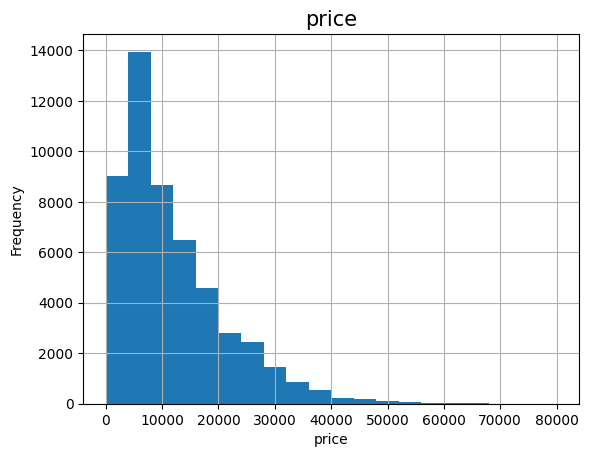

In [ ]:
graph_function(car_data, 'price', 20, (0,80000))

En el histograma para la columna `price` se puede observar que el pico más alto se encuentra entre el rango de 0-10000, existiendo una alta frecuencia de autos con precios de venta cercanos a los 6000 dólares. Antes y después del pico los valores disminuyen gradualmente, hasta llegar a aquellos vehículos con precios superiores a los 40000, los cuales presentan una frecuencia más baja. A su vez, a partir de los 60000 dólares el histograma llega a cero, si hay vehículos con precios mayores a 60000 estos son escasos. También hay que mencionar el pico de autos con valores cercanos a cero, este comportamiento es anormal ya que nos lleva a cuestionarnos la razón de colocar en venta un auto con un precio tan bajo. Tendremos que averiguar y decidir qué hacer con estos valores tan bajos y tan altos en nuestro dataframe.

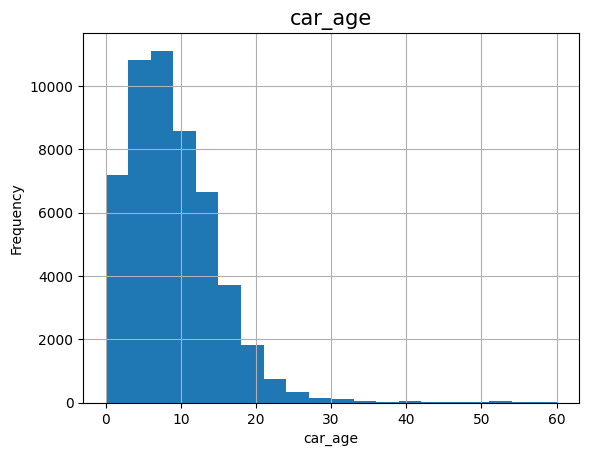

In [ ]:
graph_function(car_data, 'car_age', 20, (0,60))

Para la columna `car_age` el pico más alto se encuentra alrededor de los seis años, después de este pico los valores disminuyen gradualmente. A partir de los 30 años, las frecuencias disminuyen, indicando menor cantidad de autos de esta edad. Llegados a los 40, los valores de frecuencia alcanzan cero, así que los automóviles con una edad superior a 40 se vuelven escasos y su ocurrencia es poco frecuente.

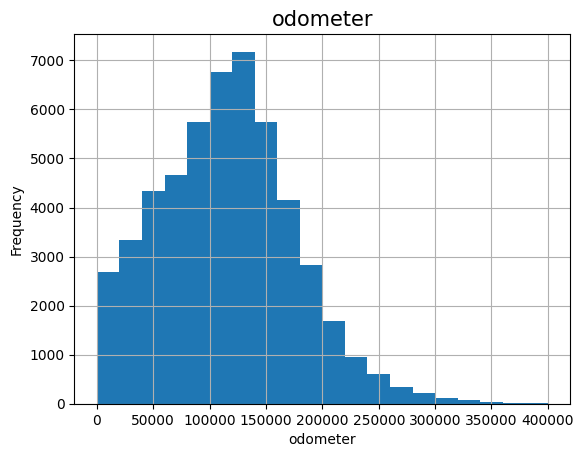

In [ ]:
graph_function(car_data, 'odometer', 20, (0,400000))

La columna `odometer` presenta el pico más alto alrededor de las 120000 millas. Luego a cada lado del pico se puede observar una disminución gradual de los valores de frecuencia. A partir de las 300000 millas las frecuencias disminuyen, lo que indica menor cantidad de autos con millajes tan altos. A su vez, son poco comunes los automóviles con un millaje superior a las 350000 millas, a partir de este valor los valores de frecuencia cercanos a cero se vuelven más comunes.

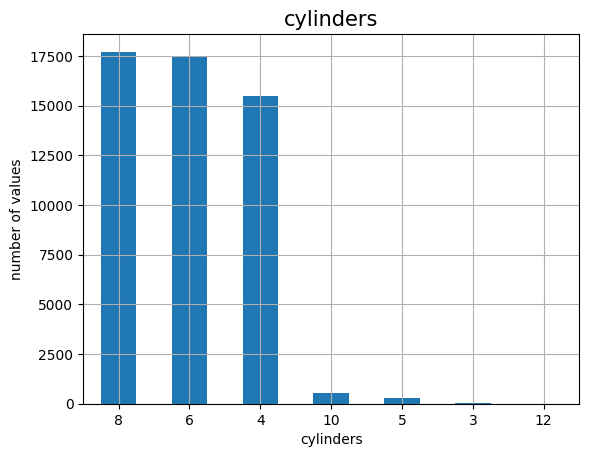

In [ ]:
graph_function(car_data, 'cylinders')

En la columna `cylinders` encontramos una mayor número de vehículos con 8 cilindros. Seguido de vehículos con un número total de cuatro cilindros. Aquellos autos con un cilindraje superior a 10 son menos frecuentes y un número de cilindros de 12 son poco usuales ya que el recuento de valores es cercano a cero.

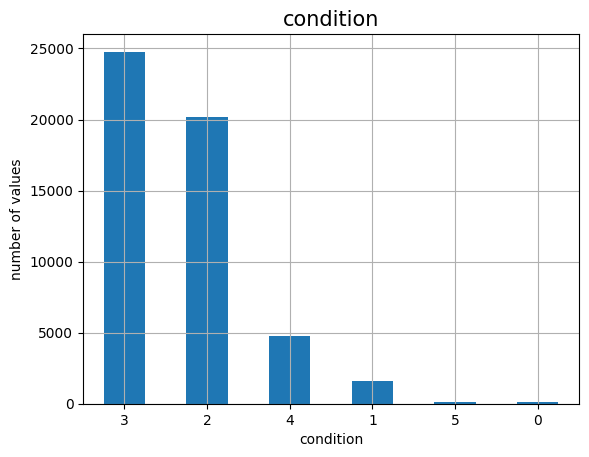

In [ ]:
graph_function(car_data, 'condition')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, las gráficas contienen rejilla para facilitar su lectura y tienen título y nombre en los ejes lo que ayuda a que sean autocontenidas.
</div>

Para la columna `condition` el mayor número de vehículos en anuncios se encuentran en estado bueno (3), registrando cerca de 25000 vehículos. A su vez, encontramos un poco más de 20000 anuncios con automóviles en condición excelente (2). En el caso de la condición como nuevo y bastante, los valores se encuentran por debajo de 5000. Finalmente, los autos en estado como nuevo y para rescate, presentan distribuciones cercanas a cero, siendo los menos comunes del conjunto de datos.

#6. Estudiar y tratar valores atípicos



En base a los histogramas de frecuencia y gráficos de caja, se puede determinar que las columnas `price`, `car_age` y `odometer` presentan valores atípicos debido a la alta presencia de frecuencias cercanas a cero, las cuales se vuelven escasas en los rangos de valores más altos para los tres parámetros. Por otro lado, hay que mencionar los aproximadamente 3000 valores cercanos a cero en la columna `price`, que van a necesitar ser analizados más a fondo para establecer si se tratan de valores atípicos.

Considerando lo mencionado anteriormente vamos a establecer límites inferiores y superiores para estos valores atípicos, y guardar estos resultados en un nuevo datafr.ame. Vamos a empezar construyendo una función `boxplot_function` que nos devuelva diagramas de caja para cada columna, la función contará con los siguientes argumentos:

- **df**: nombre del dataframe
- **column**: nombre de la columna
- **ylim**: límite de valores en el eje y con un valor predeterminado de (0,0)

In [ ]:
def boxplot_function(df, column, ylim=(0,0)):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3 - Q1

    car_data.boxplot(column)
    plt.ylim(ylim)
    plt.hlines(y=[(Q1-1.5*IQR),(Q3+1.5*IQR)], xmin=0.9, xmax=1.1, color='red')
    plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Esta función es buena, no solo realiza el boxplot también marca correctamente el intervalo intercuantil.
</div>

##Columna `price`

Vamos a observar cómo se distribuyen los valores de la columna `price` utilizando la función `boxplot_function` y llamando al método describe.

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


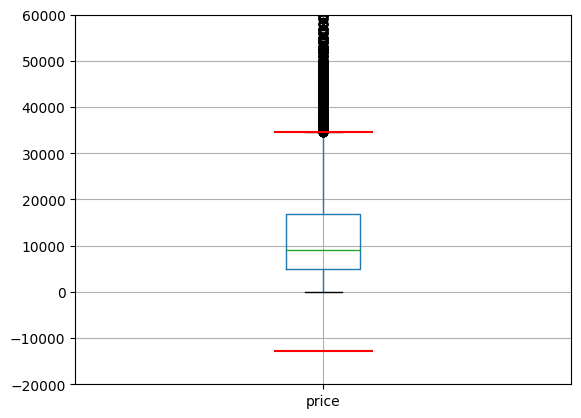

In [ ]:
print(car_data['price'].describe())
boxplot_function(car_data, 'price', (-20000,60000))

El histograma de frecuencias de la columna `price` presentó frecuencias bajas a partir de los 40000 dólares, y a partir de 60000 las frecuencias eran escasas y cercanas a cero. En el diagrama de cajas para esta columna podemos observar que el rango intercuartílico se encuentra entre 5000 y 16839, el límite máximo se encuentra cerca de los 40000 y el límite mínimo es cero. Las líneas rojas indican los valores teóricos, los cuales coinciden para el límite máximo, mientras que para el límite inferior se encuentra más allá de -10000. También podemos observar los valores atípicos por encima del límite maximo de 35000. Considerando estos resultados, pero también tomando en cuenta que parte de estos valores "atípicos" son una característica de los datos, vamos a establecer el límite superior de esta columna en 40000.

Antes de analizar las otras columnas, vamos a observar los valores cercanos a cero que se registraron en el histograma de frecuencias para la columna `price`. Llamaremos a la función `graph_function` pero nos concentraremos en aquellos valores dentro del rango de 0 a 2000.

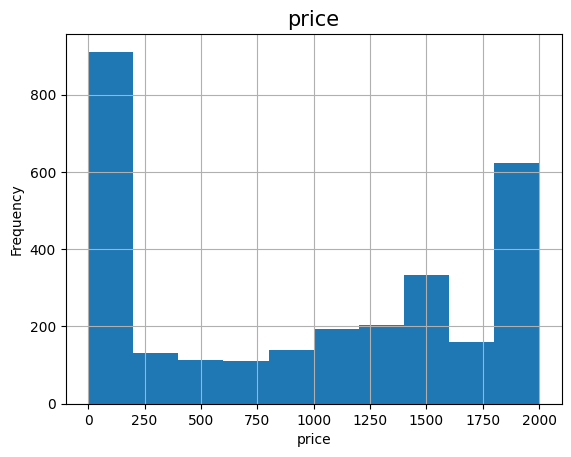

In [ ]:
graph_function(car_data, 'price', 10, (0,2000))

Podemos observar cerca de mil valores con precios cercanos a cero, lo que nos lleva a preguntarnos porqué colocar un anuncio de venta de un auto por un precio tan bajo. Quizás estos autos se encuentran en estado de rescate o chatarra por eso el precio es tan reducido, así que vamos a analizar aquellos autos con precios inferiores a los 100 dólares.

In [ ]:
car_too_cheap = car_data.query('price < 100')
car_too_cheap

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted,car_age,avg_mileage_year
405,1,2014,chevrolet camaro,3,6,gas,71310.0,automatic,coupe,NaN,False,2018-07-14,29,2011-2014,5,7,2018,4,17827.500000
3063,1,1998,chevrolet silverado,2,8,gas,164000.0,automatic,pickup,NaN,True,2018-10-11,49,<2003,3,10,2018,20,8200.000000
3808,1,2007,chevrolet tahoe,2,8,gas,200.0,automatic,suv,red,False,2019-03-18,63,2007-2011,0,3,2019,12,16.666667
3902,1,1996,ford f-150,1,8,gas,163000.0,manual,truck,white,False,2019-02-23,54,<2003,5,2,2019,23,7086.956522
4140,1,2004,chevrolet silverado,3,8,diesel,83000.0,automatic,pickup,NaN,True,2019-02-04,14,2003-2006,0,2,2019,15,5533.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,1,1986,chevrolet silverado,2,8,gas,184000.0,automatic,truck,red,True,2018-11-30,50,<2003,4,11,2018,32,5750.000000
50393,1,2003,gmc sierra 2500hd,2,8,diesel,212300.0,automatic,pickup,black,True,2019-04-12,28,2003-2006,4,4,2019,16,13268.750000
50430,5,2011,toyota sienna,2,6,gas,137587.0,automatic,suv,green,False,2018-12-03,5,2007-2011,0,12,2018,7,19655.285714
50971,10,2012,toyota prius,3,4,hybrid,101000.0,automatic,hatchback,green,False,2019-03-16,29,2011-2014,5,3,2019,7,14428.571429


Existen 863 valores inferiores a 100 dólares, en este data slice podemos encontrar autos en condiciones buenas con precios bajos, y también encontramos valores de un dólar para autos en condición buena. Filtremos aquellos valores de 1 y veamos si los valores únicos de la columna `condition` coinciden con autos en estado de rescate o chatarra.

In [ ]:
car_price_one = car_too_cheap.query('price == 1')
car_price_one['condition'].value_counts()

3    741
4     27
2     18
1      9
5      3
Name: condition, dtype: int64

In [ ]:
len(car_too_cheap)/len(car_data)*100

1.6749150897622511

Comprobamos que no existen autos en estado de rescate en nuestro data slice con vehículos de precio igual a uno. La mayoría se encuentran en una condición buena (3). En base a esto podemos inferir que los precios cercanos a cero no están relacionados con la condición del vehículo, sino más bien el vendedor del auto decidió colocar ese valor para que los compradores se comuniquen directamente con él o quizás estén relacionados con estafas. En este caso decidimos establecer el límite inferior de nuestro dataframe en 100 dólares, ya que sólo perderíamos el 1.67% de datos atípicos pero incrementaríamos la calidad de nuestros datos, sobretodo considerando que el precio es el factor más importante de este análisis. También se debe considerar que el precio mínimo de venta de un auto en estado de rescate o chatarra es de 157 dólares.



## Columna `car_age`

Ahora vamos a analizar los valores atípicos para la columna `car_age` utilizando describe y `boxplot_function`.

count    51525.000000
mean         8.522115
std          6.143691
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64


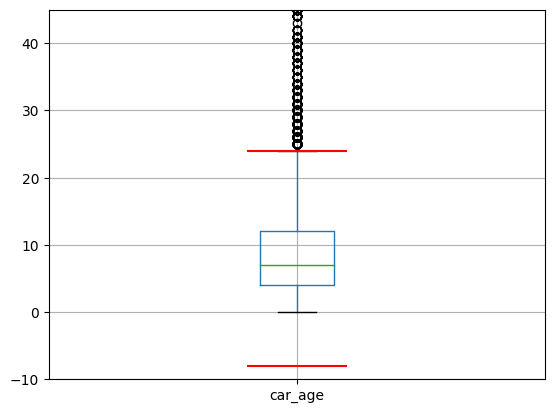

In [ ]:
print(car_data['car_age'].describe())
boxplot_function(car_data, 'car_age', (-10,45))

Recordemos que el histograma para la columna `car_age` presentó una disminución de los valores de frecuencia a partir de los 30 años, y llegados los 40 años se encontraron frecuencias cercanas a cero y escasas. Ahora si observamos el diagrama de cajas nos encontramos con un rango intercuartílico entre cuatro y doce. El límite máximo corresponde a 24 y el mínimo a 0. También hay que considerar que el valor máximo registrado por describe llega a los 110 años. Entonces, comparando las distribuciones de valores en nuestro diagrama de cajas e histograma vamos a establecer el límite superior de valores atípicos en 30. Tomamos este valor de referencia ya que es recomendable mantener ciertos valores atípicos que pueden deberse a la distribución natural de nuestros datos.



## Columna `odometer`

Llamamos al método describe y a nuestra función `boxplot_function` para la columna `odometer`.


count     51525.000000
mean     115337.469588
std       62291.937065
min           0.000000
25%       71557.000000
50%      114373.000000
75%      152732.000000
max      990000.000000
Name: odometer, dtype: float64


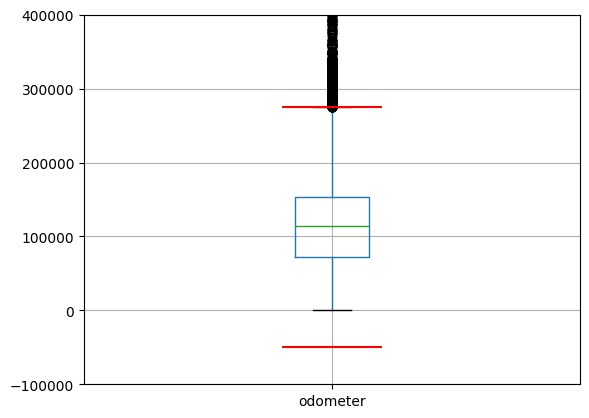

In [ ]:
print(car_data['odometer'].describe())
boxplot_function(car_data, 'odometer', (-100000,400000))

El histograma de frecuencias para la columna `odometer` se encontraron valores cercanos a cero a partir de 300000 millas y en las 400000 millas nos encontramos con valores poco frecuentes. Al observar los resultados de nuestro diagrama de cajas, podemos observar que los límites del rango intercuatílico (IQR) se encuentran entre 71557 y 152732. El límite mínimo corresponde a cero y el máximo a 275000. Considerando todo esto, vamos a establecer nuestro límite superior para la columna millaje en 300000, esto debido a que al encontrar tanto valores atípicos por encima del bigote superior es mejor mantener algunos de estos valores ya que están relacionados con características propias de nuestros datos.



## Conclusiones y nuevo dataframe

Después de revisar las descripciones numéricas y diagramas de caja para nuestras tres columnas que presentan valores atípicos significativos, hemos decicido establecer como límite inferior a aquellos valores por debajo de 100 dólares para el precio. El límite inferior se decide establecer en base a la existencia de valores 1 que no son valores típicos para el precio de un vehículo, pudiendo suponer que son errores al ingresar datos o hasta estafas en línea. También se establece este precio mínimo ya que el precio promedio de venta de un auto en estado de rescate es de aproximadamente 157 dólares.

En el caso de los límites superiores, se establecerán aquellos valores por encima de 40000 para el precio del vehículo, 30 para la edad el vehículo y 300000 para la edad del vehículo.  Los límites superiores se establecen gracias a gráficos de caja, sin embargo no utilizamos los valores establecidos por los bigotes del diagrama ya al encontrar un alto número de valores atípicos es recomendable mantener parte de estos datos que están relacionados con las características de nuestros datos.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas conclusiones.
</div>

Una vez establecidos los límites superiores e inferiores para los valores atípicos procedemos a filtrar nuestro dataframe en base a estos rangos y guardarlo en la variable `car_data_filtered`. En definitiva perderemos un total de 2283 filas, que corresponden al 4.43% de nuestros datos.

In [ ]:
car_data_filtered = car_data.query('100 < price < 40000 & car_age < 30 & odometer < 300000')
car_data_filtered.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_group,day_posted,month_posted,year_posted,car_age,avg_mileage_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,2007-2011,5,6,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2007-2011,4,10,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2011-2014,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,158000.0,automatic,pickup,NaN,False,2019-03-22,9,2003-2006,4,3,2019,16,9875.000000
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,>2015,1,4,2019,2,40451.500000


In [ ]:
car_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49242 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             49242 non-null  int64         
 1   model_year        49242 non-null  int64         
 2   model             49242 non-null  object        
 3   condition         49242 non-null  int64         
 4   cylinders         49242 non-null  int64         
 5   fuel              49242 non-null  object        
 6   odometer          49242 non-null  float64       
 7   transmission      49242 non-null  object        
 8   type              49242 non-null  object        
 9   paint_color       40384 non-null  object        
 10  is_4wd            49242 non-null  bool          
 11  date_posted       49242 non-null  datetime64[ns]
 12  days_listed       49242 non-null  int64         
 13  year_group        49242 non-null  object        
 14  day_posted        4924

#7. Estudiar parámetros principales sin valores atípicos

Una vez establecido nuestro nuevo dataframe sin valores atípicos `car_data_filtered`, es necesario volver a comparar los histogramas de frecuencia entre nuestros datos con y sin valores atípicos en las cinco columnas antes analizadas. Para esto volvemos a llamar a nuestra función graph_function y las aplicamos a las columnas `price`, `car_age`, `odometer`, `cylinders`, `condition`.

count    49242.000000
mean     11794.834958
std       8402.389739
min        105.000000
25%       5295.000000
50%       9200.000000
75%      16499.000000
max      39999.000000
Name: price, dtype: float64


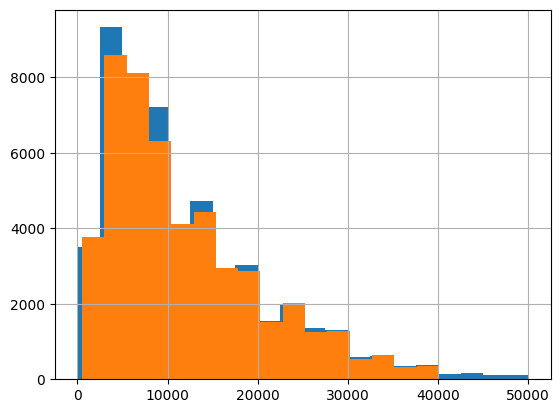

In [ ]:
print(car_data_filtered['price'].describe())
car_data['price'].hist(bins=20, range=(0,50000))
car_data_filtered['price'].hist(bins=20, range=(500,50000))
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Al comparar dos histogramas siempre se recomienda usar un parámetro de transparencia alpha=0.5 para visualizar lo que ocurre detras de la gráfica y que no se traslapen. También se recomienda colocar las leyendas para saber cual gráfica corresponde a cual distribución.
</div>

En nuestro primer histograma sin valores atípicos de la columna `price`, pudimos observar que el pico más alto se encontraba entre el rango de 0 a 10000, ahora podemos observar claramente que el pico más alto se encuentra en 5000. También aparecen nuevos picos evidentes aproximadamente a los 15000 y a los 22000. La cola con valores atípicos que se presentaban a partir de 40000 se ha perdido y se ha reducido los valores con frecuencias cercanas a cero. En el caso de la desviación estándar ha disminuido de 10040 a 8402. Hemos perdido también valores mínimos iguales a 1, y valores extremos que llegaban hasta los 375.000. El nuevo valor mínimo se encuentra en 105 y el máximo en 39999. En el caso de la mediana incrementó ligeramente de 9000 a 9200.

count    49242.000000
mean         8.418545
std          5.315977
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         29.000000
Name: car_age, dtype: float64


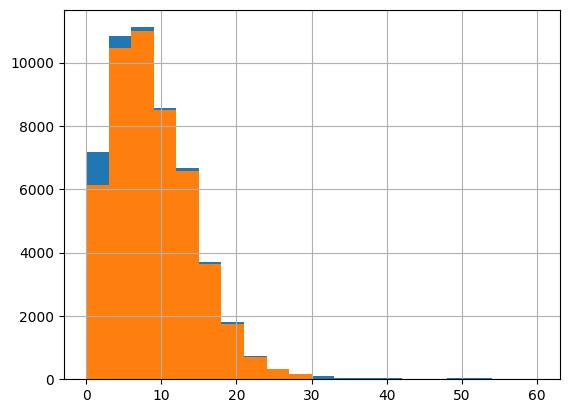

In [ ]:
print(car_data_filtered['car_age'].describe())
car_data['car_age'].hist(range=(0,60), bins=20)
car_data_filtered['car_age'].hist(range=(0,60), bins=20)
plt.show()

En la columna `car_age` el pico más alto se encuentra alrededor de los ocho años. La desviación estándar se redujo de 6.14 a 5.25, en tanto que la mediana se mantuvo en 7. El cambio producido en la media fue mínimo, disminuyendo de 8.52 a 8.31. Se redujo la cola con valores cercanos a una frecuencia de cero. En el límite máximo podemos evidenciar que se perdió el valor atípico antes registrado de 110 años, y a ahora se establece en el valor de 29.

count     49242.000000
mean     116285.363937
std       57571.944767
min           0.000000
25%       75000.000000
50%      116410.000000
75%      153322.000000
max      299999.000000
Name: odometer, dtype: float64


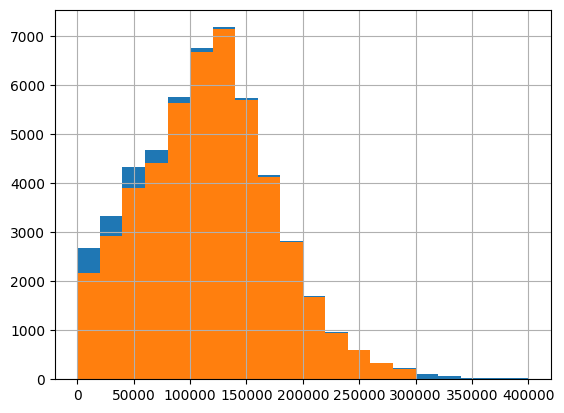

In [ ]:
print(car_data_filtered['odometer'].describe())
car_data['odometer'].hist(range=(0,400000), bins=20)
car_data_filtered['odometer'].hist(range=(0,400000), bins=20)
plt.show()

En la columna `odometer` nos encontramos que el pico más alto se registra a las 120000 millas, después del pico los valores disminuyen gradualmente, y observamos que ya no existe una cola larga con valores de frecuencias cercanas a cero, ahora encontramos una distribución más normal de los datos. En el caso de la desviación estándar disminuyó de 62291 a 57571, y la mediana aumentó de 114373 a 116410.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Comparaste correctamente las distribuciones con estos histogramas y realizaste buenos comentarios.
</div>

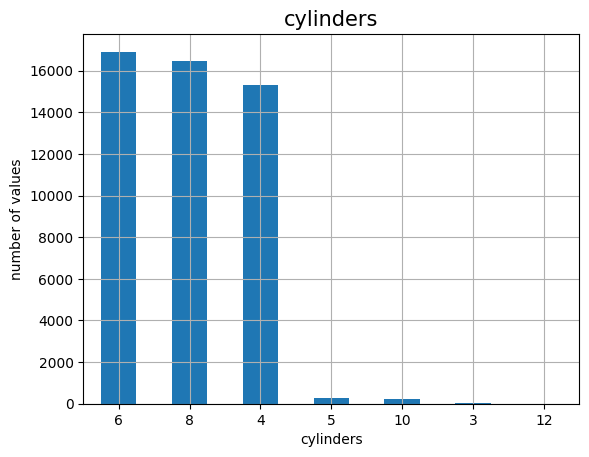

In [ ]:
graph_function(car_data_filtered, 'cylinders')

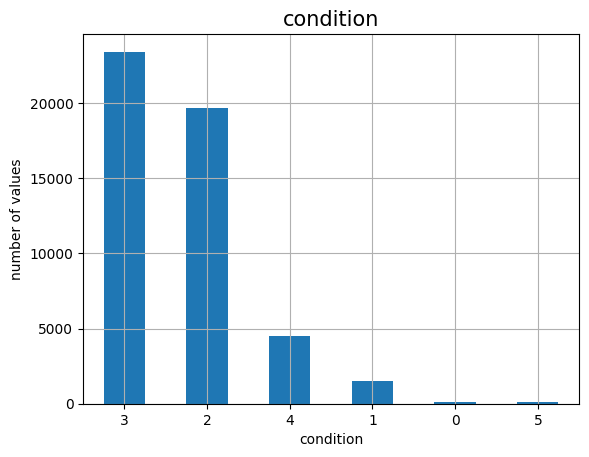

In [ ]:
graph_function(car_data_filtered, 'condition')

En el caso de la columna `cylinders` encontramos una disminución en los valores del recuento de valores únicos, pasando de 17500 con valores típicos a 16000 en el nuevo dataframe car_data_filtered. En la columna `condition` también se registra una ligera disminución de los valores de recuento.

Al comparar nuestro dataframe con valores atípicos y sin valores atípicos encontramos que no hubo variación en los picos de los gráficos para las columnas `price`, `car_age` y `odometer`, sin embargo se registraron ligeros cambios en la altura de los picos que podrían estar relacionados con el incremento de ruido estadístico al trabajar con un dataframe más pequeño. Los cambios más evidentes se registran con la desaparición de colas largas de los histogramas debido a la eliminación de valores con frecuencias cercanas a cero. A su vez se observó una disminución de la desviación estándar, y se pudo observar ligeros cambios en las medianas, comprobando que la mediana es más resistente a los cambios producidos por valores atípicos.



#8. Período de colocación de los anuncios



Vamos a analizar a la columna `days_listed` para encontrar el período típico de colocación de un anuncio. En primer lugar, llamaremos al método describe para obtener una descripción numérica de la columna.

In [ ]:
car_data_filtered['days_listed'].describe()

count    49242.000000
mean        39.555481
std         28.223238
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

La media para el número de días que dura un anuncio es de 39.55, mientras que la mediana se encuentra en 33. No existe una diferencia significativa entre la media y la mediana, y la desviación estándar es de 28.23, el valor mínimo registrado es de cero y el máximo de 271 días.

En base a esto se puede establecer que el tiempo promedio de duración de un anuncio es de 39 días. Para poder establecer la vida útil habitual de un anuncio vamos a aplicar la función plot a la columna `days_listed` con el parámetro hist.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen comentario.
</div>

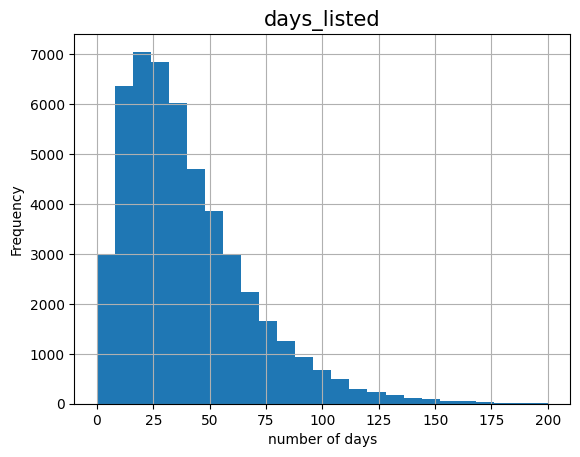

In [ ]:
car_data_filtered['days_listed'].plot(kind='hist', bins=25, range= (0,200), grid=True)
plt.title('days_listed', fontsize = 15)
plt.xlabel('number of days')
plt.show()

El mayor número de anuncios tuvo una duración de alredor de 30 días, a partir de los 100 días existe una disminución en la frecuencias, y desde los 150 días las frecuencias cercanas a cero se vuelven más evidentes, pudiendo determinar que anuncios con más de 150 días son escasos. La mayor parte de anuncios se encuentran en el primer rango de duración entre 0 a 50 días.

Con el histograma de frecuencias se hace más claro que son raros los anuncios con más de 150 días de duración, para poder establecer exactamente el período de tiempo dentro del cual un anuncio se elimina rápidamente o se mantiene un tiempo extremadamente largo, vamos a construir un diagrama de cajas de la columna `days_listed`.

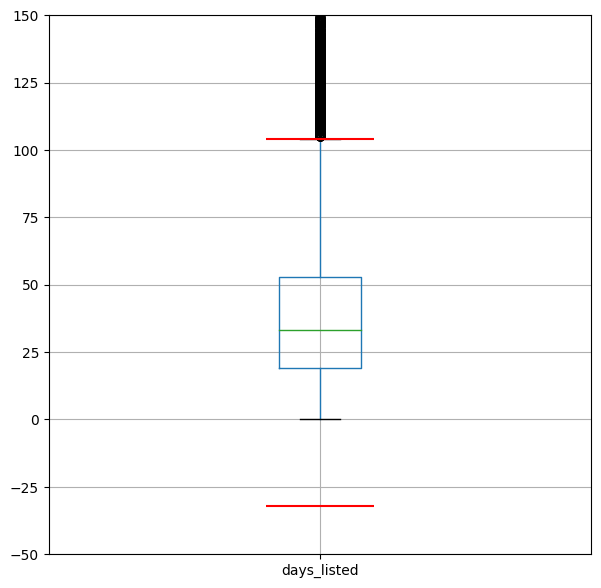

In [ ]:
Q1= 19
Q3= 53
IQR = Q3 - Q1
car_data_filtered.boxplot(column='days_listed', figsize = (7,7))
plt.ylim(-50,150)
plt.hlines(y=[(Q1-1.5*IQR),(Q3+1.5*IQR)], xmin=0.9, xmax=1.1, color='red')
plt.show()

En nuestro diagrama de caja se puede observar que el período habitual de duración de un anuncio se encuentra entre los 19 a 53 días, el cual corresponde con el rango intercuartílico. El tiempo promedio se encuentra en los 33 días de duración. El bigote inferior se encuentre en cero y el bigote superior se encuentra en 104. El valor teórico superior se ubica cerca del valor trazado, mientras que el valor teórico inferior se ubica por debajo de cero.

Concluimos entonces que el tiempo promedio de duración de un anuncio es de 39 días, la vida útil habitual es de 19 a 53 días. Los anuncios que tienen un tiempo de duración entre 0 a 19 días se consideran que se eliminan rápidamente, mientras que aquellos con una duración mayor a 104 días se pueden considerar anuncios anormalmente largos.

#9. Precio promedio por cada tipo de vehículo

Para poder establecer qué parámetros influyen en el precio de venta de un vehículo, vamos a establecer los dos tipos de vehículos con mayor número de anuncios en nuestro dataframe filtrado sin valores atípicos. Empezamos por crear una tabla dinámica `type_price` que agrupará a los diferentes tipos de vehículos y devolverá la mediana del precio para cada uno de estos. También llamaremos a count para obtener el recuento de anuncios para cada categoría.

In [ ]:
type_price = car_data_filtered.pivot_table(index='type', values='price', aggfunc = ['median', 'count'])
type_price.columns = ['price', 'ads']
type_price.sort_values(by='ads', ascending=False).reset_index()

,type,price,ads
0,sedan,5997.0,11931
1,suv,8980.0,11918
2,truck,14995.0,11515
3,pickup,14000.0,6709
4,coupe,13750.0,2018
5,wagon,7900.0,1527
6,mini-van,6497.5,1152
7,hatchback,5995.0,1015
8,van,7999.0,609
9,convertible,11997.0,374


<Axes: xlabel='type'>

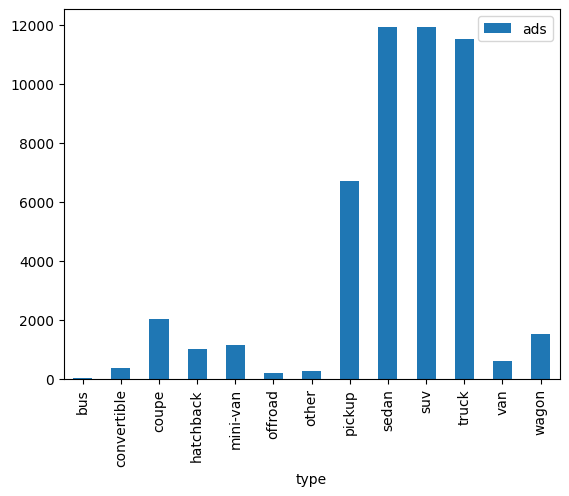

In [ ]:
type_price.plot(kind='bar', y='ads')

Los precios más altos corresponden truck, pickup y coupe con precios de 14995, 14000 y 13900 respectivamente. Los tipos de autos con precios más bajos son los automóviles tipo sedan y hatchback. También podemos observar que el número de anuncios más elevado corresponde a suv, sedan y truck. Se puede destacar que los autos con mayor número de anuncios presentan precios relativamente bajos, quizás el mayor número de anuncios de un sedan está relacionado a que su precio es accesible, lo que los convierte en un auto fácil de vender.

Ahora vamos a visualizar la dependencia del tipo de auto con el número de anuncios, para esto primero vamos a agrupar en la categoría Other a todos los vehículos por debajo de los 1500 anuncios. Llamamos al método query y obtenemos los índices de `type_price` que tienen más de 1500 anuncios y lo almacenamos en la variable `main_types`.

In [ ]:
main_types =  type_price.query('ads > 1500').index
main_types

Index(['coupe', 'pickup', 'sedan', 'suv', 'truck', 'wagon'], dtype='object', name='type')

Una vez establecidos los tipos de auto más populares, vamos a reemplazar los tipos de vehículos con menos de 1500 anuncios, para esto aplicaremos where al índice de la tabla `type_price` y reemplazaremos el tipo de vehículo con other, utilizando el método where que realizará la transformación cuando el índice no coincida con los nombres de la lista `main_types`.

In [ ]:
type_price['type_group'] = type_price.index.where(type_price.index.isin(main_types), 'other')
type_price.head()

,price,ads,type_group
type,,,
bus,10500.0,24,other
convertible,11997.0,374,other
coupe,13750.0,2018,coupe
hatchback,5995.0,1015,other
mini-van,6497.5,1152,other


Ahora vamos a construir un gráfico de barras que nos muestre la dependencia del número de anuncios en cada tipo de auto, agruparemos los valores de la columna `type_group` con un tabla dinámica y posteriormente utilizaremos el método plot para obtener nuestro gráfico.

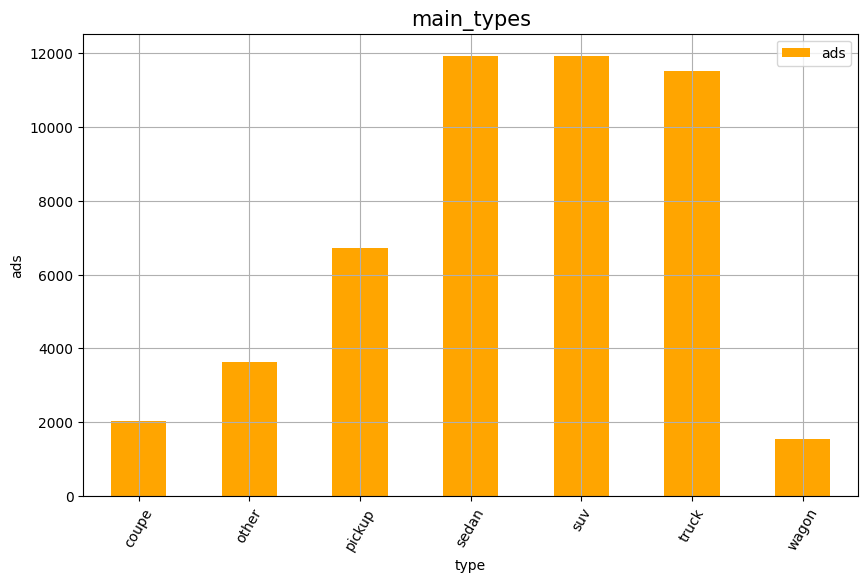

In [ ]:
type_price.pivot_table(index='type_group', values='ads', aggfunc='sum').plot(kind='bar', figsize=(10,6), color='orange', grid=True, rot=60)
plt.title('main_types', fontsize=15 )
plt.xlabel('type')
plt.ylabel('ads')
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

En gráficas de barras es bueno ajustar las barras de mayor a menor para mejorar su comprensión y lectura.
</div>

Ahora podemos observar claramente que los dos tipos de vehículos que contienen el mayor número de anuncios corresponden a suv y sedan, así que utilizaremos estos dos para poder responder a nuestra pregunta inicial sobre que parámetros influyen en el precio de un vehículo.

#10. Factores de precio

A partir del gráfico de barras pudimos establecer que los tipos de auto más populares en nuestro sitio web fueron los suv y sedan. En base a esto, vamos a determinar cómo el millaje promedio al año, condición, edad, tipo de transmisión y color influyen en el precio de estos dos tipos de vehículos. Para este análisis vamos a generar gráficos de caja agrupados por cada categoría para las variables categóricas y para las variables numéricas se establecerán gráficos de dispersión.

Considerando esto, vamos a crear la función `group_graph` que devolverá un gráfico de caja para las columnas categóricas `transmission`, `condition` y `paint_color`. Por otro lado, para las columnas numéricas `car_age`, `avg_mileage_year` y `odometer` devolverá un gráfico de dispersión. Utilizaremos las funciones `boxplot` y `plot` con la opción scatter del parámetro kind. Nuestra función contará con los siguientes parámetros:

- **df**: nombre del dataframe
- **column_x**: valor de x para gráficos de dispersion y el valor de by en boxplot.
- **column_y**: valor de y para gráficos de dispersion y el valor de column en boxplot.
- **fig_number**: tamaño del gráfico en pulgadas siendo su valor predeterminado (0,0).
- **alpha_number**: factor de transparencia de puntos en gráficos de dispersión.



In [ ]:
def group_graph(df, column_x, column_y, fig_number=(0,0),  alpha_numer=0):

    if column_x == 'transmission' or column_x == 'condition' or column_x == 'paint_color':
        for category, data in df.groupby('type'):
            data.boxplot(column=column_y, by=column_x, figsize=fig_number)
            plt.title(category)
            plt.ylabel('price')
            plt.show()

    if column_x == 'car_age' or column_x == 'avg_mileage_year' or column_x == 'odometer':
        for category, data in df.groupby('type'):
            data.plot(kind='scatter', x=column_x, y=column_y, alpha= alpha_numer, figsize=fig_number)
            plt.title(category)
            plt.show()

## SUV

Empezaremos creando el data slice `suv_data` que guardará únicamente los anuncios relacionados con los tipos de vehículos SUV. Para esto utilizaremos el método query(). Luego llamaremos únicamente a las columnas que nos interesan para comprobar nuestras hipótesis `price`,`car_age`, `odometer`, `avg_mileage_year`, `condition`, `transmission`, `paint_color`.

In [ ]:
suv_data = car_data_filtered.query('type == "suv"')
suv_data =  suv_data[['price','car_age', 'odometer','avg_mileage_year', 'condition', 'transmission', 'paint_color', 'type']]
suv_data.reset_index(drop=True).head()

,price,car_age,odometer,avg_mileage_year,condition,transmission,paint_color,type
0,9400,7,145000.0,20714.285714,2,automatic,NaN,suv
1,15990,6,109473.0,18245.500000,3,automatic,black,suv
2,11500,6,104174.0,17362.333333,3,automatic,NaN,suv
3,9200,11,147191.0,13381.000000,3,automatic,blue,suv
4,12990,10,132285.0,13228.500000,3,automatic,black,suv


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Muy bien! Usaste correctamente la función query para filtrr los datos deseados.
</div>

Para este análisis vamos a considerar aquellas variables categóricas que contengan más de 50 anuncios, es así que las categorías con menos de 50 anuncios serán eliminadas. Para esto vamos a llamar a las tres variables categóricas `condition`,`transmission`  y `paint_color`, y aplicaremos un bucle for que ejecute un recuento de las variables únicas a través del método value_counts.

In [ ]:
suv_data_categorical = suv_data[['condition', 'transmission', 'paint_color']]
for column in suv_data_categorical:
    print(suv_data_categorical[column].value_counts())

3    6190
2    4263
4    1119
1     311
0      20
5      15
Name: condition, dtype: int64
automatic    11339
manual         486
other           93
Name: transmission, dtype: int64
black     2076
white     1893
silver    1515
grey      1158
blue      1013
red        885
green      429
brown      363
custom     279
orange      82
yellow      48
purple      39
Name: paint_color, dtype: int64


En la variable `condition` las categorías 0 y 5 presentan menos de 50 anuncios, y en la variable `paint_color` yellow y purple presentan menos de 50 anuncios. Aplicaremos query con la opción not in que especifique los valores antes mencionados. De esta manera se han eliminado las categorías con menos de 50 anuncios.

In [ ]:
suv_data = suv_data.query('condition not in(0,5) & paint_color not in("yellow", "purple")')

Ahora llamaremos a nuestra función `group_graph` y estableceremos la relación que existe entre las tres variables categóricas y el precio de un vehículo en el tipo SUV.

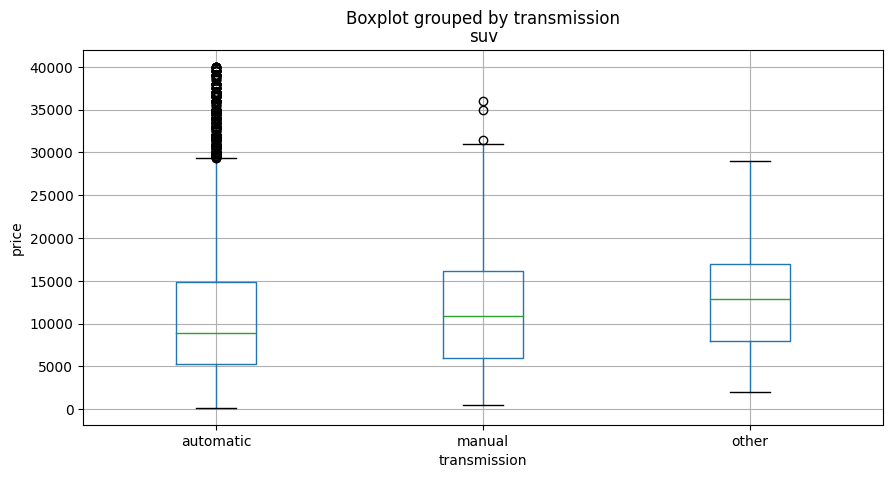

In [ ]:
group_graph(suv_data, 'transmission', 'price', (10,5))

En relación al tipo de transmisión, la categoría otros presenta un precio superior a a vehículos suv con transmisión manual o automática.

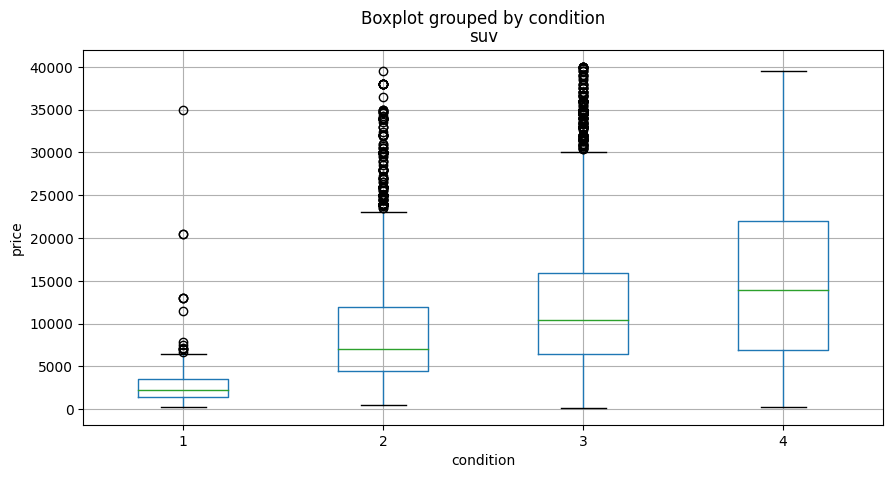

In [ ]:
group_graph(suv_data, 'condition', 'price', (10,5))

Los vehículos suv que presentan una condición categorizada como nueva son los que registran un mayor precio, seguido de los autos en condición excelente. Los autos con precios más bajos son aquellos en la categoría 1 o bastante, con un precio de alredor 2500 dólares.

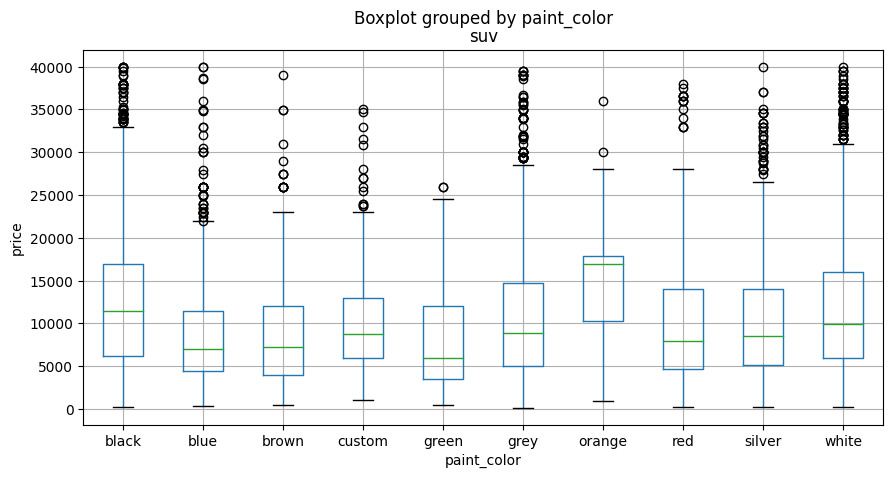

In [ ]:
group_graph(suv_data, 'paint_color', 'price', (10,5))

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Las gráficas se ven muy bien y además son muy útiles al acomodarlas una junto a la otra pues las cajas son más fáciles de interpretar y comparar entre ellas.
</div>

En relación al color del vehículo, podemos observar que vehículos suv de color naranja presentan el precio más alto, entre los 15000 a 20000 dólares. Luego se encuentran los suv de color negro y blanco. Los autos con precios más bajos corresponden a colores azul, café y verde. Sin embargo, no se encuentra una diferencia significativa como para afirmar una dependencia del precio al color.

Vamos a trazar gráficos de dispersión para la variable `car_age`, `odometer`, `avg_mileage_year`, y posteriormente utilizaremos el método corr para establecer una matriz de correlación entre las variables numéricas de nuestra dataframe filtrado para suv.

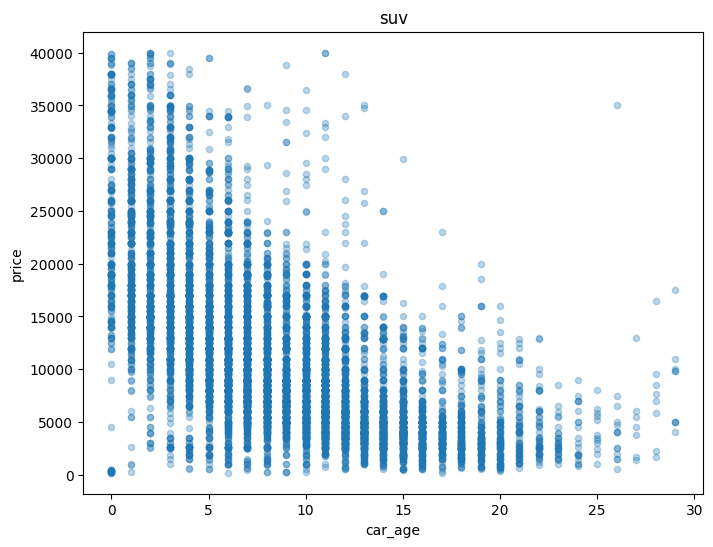

In [ ]:
group_graph(suv_data, 'car_age', 'price', (8,6), 0.3)

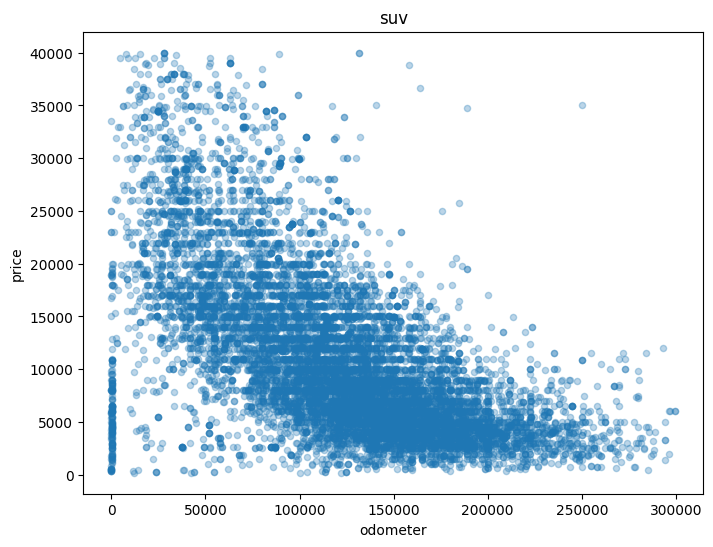

In [ ]:
group_graph(suv_data, 'odometer', 'price', (8,6), 0.3)

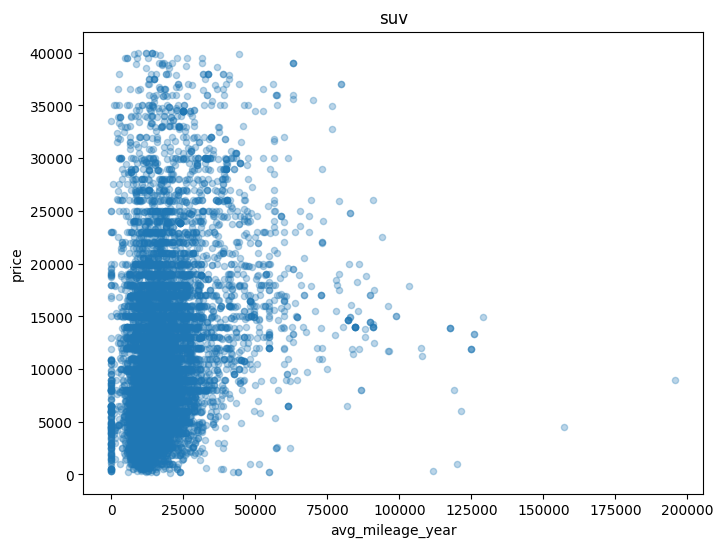

In [ ]:
group_graph(suv_data, 'avg_mileage_year', 'price', (8,6), 0.3)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, usaste alpha=0.5 en el scatterplot para que se visualice mejor las regiones donde se acumulan más puntos.
</div>

In [ ]:
suv_data.corr()

<ipython-input-153-a4ac11f16ca1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  suv_data.corr()


,price,car_age,odometer,avg_mileage_year,condition
price,1.000000,-0.635362,-0.604537,0.280531,0.295595
car_age,-0.635362,1.000000,0.618402,-0.558500,-0.336342
odometer,-0.604537,0.618402,1.000000,-0.030928,-0.324420
avg_mileage_year,0.280531,-0.558500,-0.030928,1.000000,0.100809
condition,0.295595,-0.336342,-0.324420,0.100809,1.000000


Una matriz de correlación nos devuelve valores del coeficiente de correlación de Pearson entre -1 a 1, mientras más cerca se encuentre el valor a uno existe una correlación lineal positiva, mientras más se acerca a -1 la correlación lineal es negativa. A su vez, mientras más se acerquen a cero los valores existe una correlación pero no del tipo lineal. En base a esto podemos establecer que entre la edad del auto y el precio existe una correlación negativa ya que obtuvimos una correlación de -0.63, esto se confirma en el gráfico de dispersión, en el cual se observa que a mayor edad de un vehículo disminuye su precio. Hay que recalcar que la relación lineal es moderada ya que existen varios puntos dispersos.

En el caso del millaje obtuvimos un coeficiente de -0.60, lo que indica nuevamente una correlación lineal negativa, esto se evidencia en nuestro gráfico de dispersión, en el cual se observa una tendencia hacia abajo de nuestros datos, indicando que a mayor millaje, el precio de un vehículo suv tiende a disminuir.

Al analizar el millaje promedio al año de un vehículo suv obtuvimos un coeficiente de correlación de 0.2805, indicando una correlación lineal positiva, como se puede observar en el gráfico de dispersión, a medida que incrementa el millaje promedio anual hay un incremento del precio del vehículo, lo que difiere de la relación encontrada en la columna `odometer`. Esto podría deberse a que vamos a encontrar autos nuevos de alto millaje o autos viejos con bajos recorridos, lo que se comprueba en el valor de correlación de -0.55 entre el millaje anual y la edad de un vehículo, que establece que a menor millaje anual mayor será la edad del vehículo.

El coeficiente de correlación lineal entre la condición de un vehículo y el precio fue de 0.295, lo que indica una correlación positiva y considerable, es decir que a una mejor condición del vehículo, mayor será su precio. Esto también lo observamos en nuestro diagramas de cajas, en el cual el precio mayor correspondía a la categoría 4.

Finalmente, hay que mencionar la relación entre el millaje y la edad de un vehículo suv, en la cual se obtuvo un coeficiente de correlación de 0.61, indicando una correlación positiva, es decir a medida que incrementa la edad del vehículo también incrementa su millaje.



## Sedan

Ahora vamos a analizar como influyen los diferentes parámetros en el precio de vehículos de tipo sedan. Para esto primero crearemos un data slice con solo los anuncios referentes a sedan, para esto llamaremos al método query. Posteriormente filtraremos el data slice con las columnas necesarias para este análisis, en este caso serán `price`, `car_age`, `odometer`, `avg_mileage_year`,`condition`, `transmission` y `paint_color`.

In [ ]:
sedan_data = car_data_filtered.query('type == "sedan"')
sedan_data = sedan_data[['price','car_age', 'odometer','avg_mileage_year', 'condition', 'transmission', 'paint_color', 'type']]
sedan_data.reset_index(drop=True).head()

,price,car_age,odometer,avg_mileage_year,condition,transmission,paint_color,type
0,5500,6,110000.0,18333.333333,4,automatic,red,sedan
1,14900,2,80903.0,40451.500000,3,automatic,black,sedan
2,14990,4,57954.0,14488.500000,3,automatic,black,sedan
3,12990,3,79212.0,26404.000000,3,automatic,white,sedan
4,8990,7,111142.0,15877.428571,3,automatic,grey,sedan


Previamente establecimos que para las variables categóricas solo trabajaremos con aquellas categorías que presentan más de 50 anuncios, así que procederemos a eliminar estas categorias. Primero filtraremos solo las columnas categóricas y las almacenaremos temporalmente en la variable `sedan_data_categorical`. Una vez realizado esto, realizaremos un bucle for que nos devuelva los recuentos de valores únicos para estas tres columnas.

In [ ]:
sedan_data_categorical = sedan_data[['condition', 'transmission', 'paint_color']]
for column in sedan_data_categorical:
    print(sedan_data_categorical[column].value_counts())

3    5964
2    4281
4    1310
1     289
5      46
0      41
Name: condition, dtype: int64
automatic    11272
manual         585
other           74
Name: transmission, dtype: int64
silver    2038
black     1746
grey      1617
white     1469
blue      1210
red        919
custom     269
brown      257
green      206
purple      26
yellow      23
orange       9
Name: paint_color, dtype: int64


Para la columna `condition` vamos a eliminar las categorías de 0 y 5 ya que presentan menos de 50 anuncios. En la columna `transmission` encontramos más de 50 anuncios en las tres categorías. Para la variable `paint_color` vamos a eliminar las categorías de color purple, yellow y orange. Aplicamos entonces el método query y eliminamos las categorías específicas utilizando not in.

In [ ]:
sedan_data = sedan_data.query('condition not in(0,5) & paint_color not in("yellow", "purple","orange")')

Con nuestros datos para sedan sin variables categóricas con menos de 50 anuncios vamos a llamar a la función `group_graph` creada anteriomente y obtendremos diagramas de caja para las variables categóricas y gráficos de dispersión para las variables numéricas.

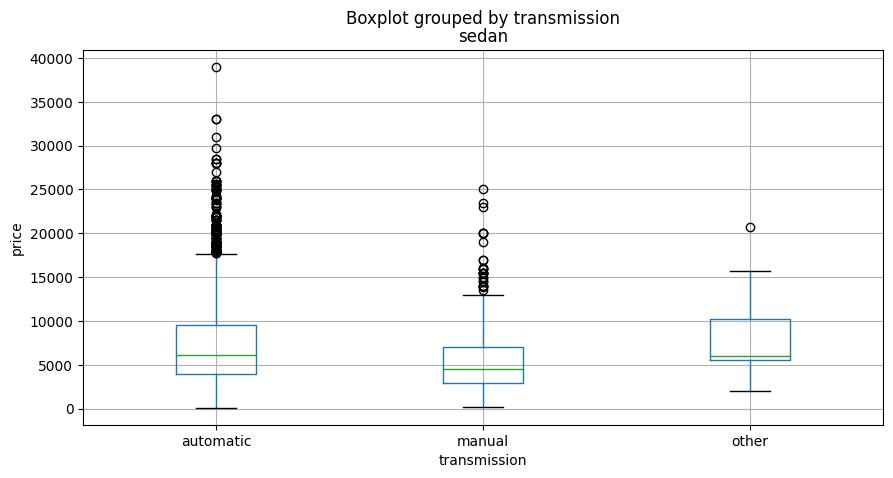

In [ ]:
group_graph(sedan_data, 'transmission', 'price', (10,5))

En el caso de la transmisión para los vehículos sedan, el tipo de transmisión más cara corresponde a los vehículos automáticos por encima de los vehículos con transmisión manual y otro tipo de transmisión.

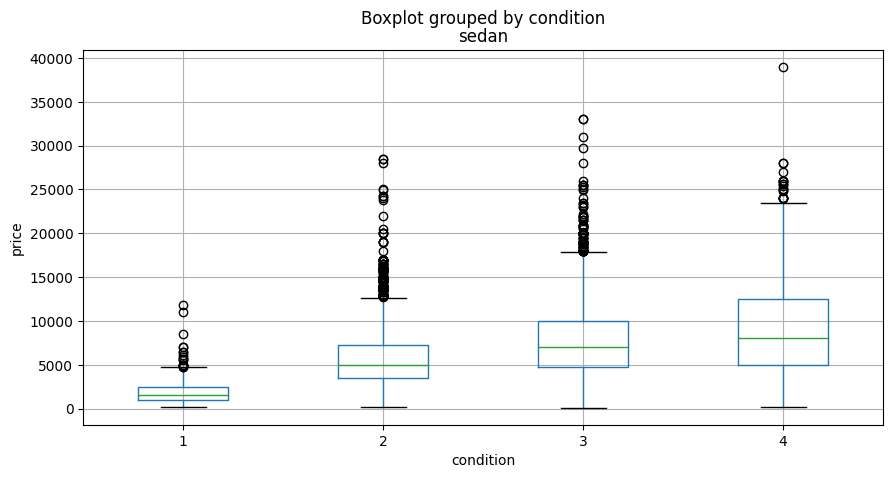

In [ ]:
group_graph(sedan_data, 'condition', 'price', (10,5))

En el caso de la condición en la que se encuentra los vehículos sedan, podemos observar que al igual que los suv, los vehículos en condición como nueva presentan una mayor precio, seguidos de vehículos en condición excelente. Los vehículos más baratos son aquellos en condición bastante o fair.

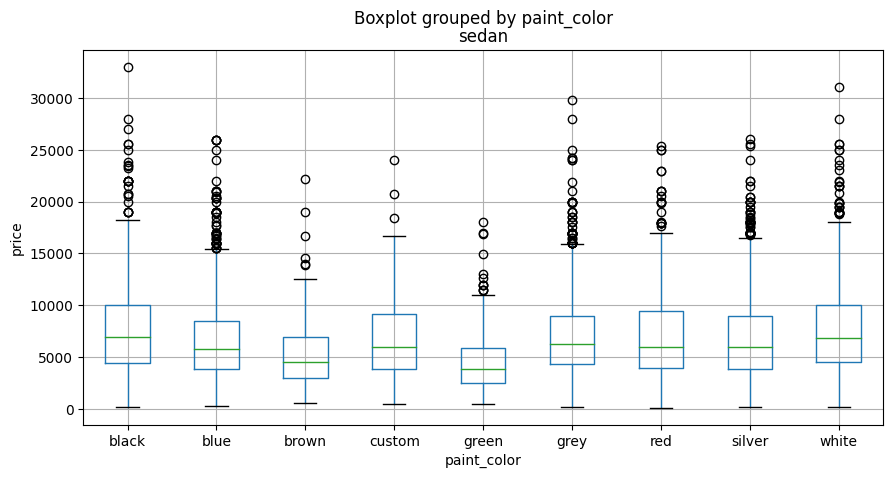

In [ ]:
group_graph(sedan_data, 'paint_color', 'price', (10,5))

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas gráficas.
</div>

En el caso del color, el precio más alto corresponde a los colores negro, gris y blanco. Los vehículos con precios más bajos corresponden a colores verde y café. Cabe mencionar que al parecer no existe una dependencia grande del precio con el color, ya que el tamaño de las cajas nos indica que todos los colores tienen precios similares que no varían mucho entre sí.

Ahora vamos a analizar las variables numéricas para eso trazaremos gráficos de dispersión y una matriz de dispersión que nos permitirán establecer cómo influyen estas variables en el precio a través del coeficiente de correlación de Pearson.

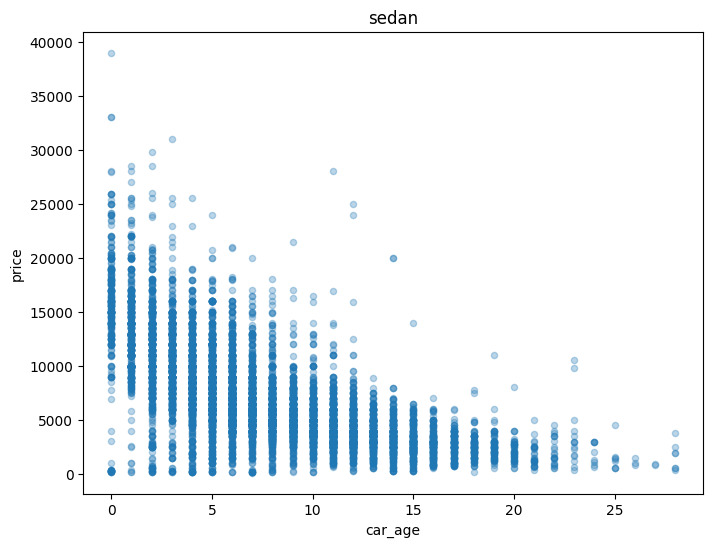

In [ ]:
group_graph(sedan_data, 'car_age', 'price', (8,6), 0.3)

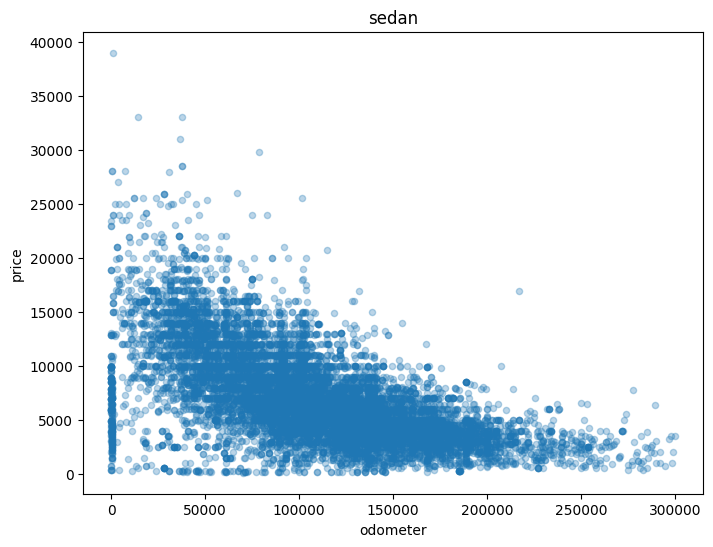

In [ ]:
group_graph(sedan_data, 'odometer', 'price', (8,6), 0.3)

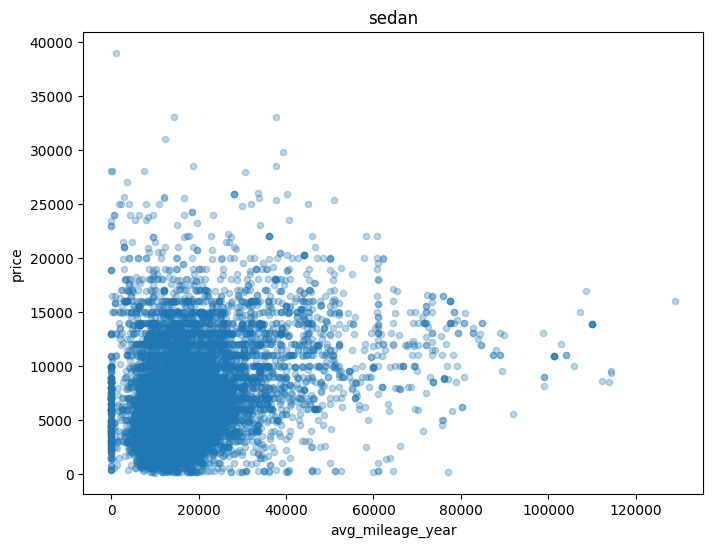

In [ ]:
group_graph(sedan_data, 'avg_mileage_year', 'price', (8,6), 0.3)

In [ ]:
sedan_data.corr()

<ipython-input-163-762e09967f70>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sedan_data.corr()


,price,car_age,odometer,avg_mileage_year,condition
price,1.000000,-0.667477,-0.605556,0.303633,0.310923
car_age,-0.667477,1.000000,0.612362,-0.534684,-0.324167
odometer,-0.605556,0.612362,1.000000,0.030929,-0.330822
avg_mileage_year,0.303633,-0.534684,0.030929,1.000000,0.096827
condition,0.310923,-0.324167,-0.330822,0.096827,1.000000


El precio y edad de un vehículo presentaron un coeficiente de correlación de -0.664, lo que indica una correlación lineal negativa, esto se hace evidente en el gráfico de dispersión para las dos variables, en la cual observamos como el precio tiende a disminuir a medida que incrementa la edad del vehículo. Hay que mencionar que el tipo de relación entre las dos variables es moderada ya que existen varios valores dispersos de la tendencia general.

En el caso de la relación entre el millaje y el precio de un vehículo sedan, nos encontramos con un coeficiente de relación de -0.605, pudiendo establecer una relación moderada lineal pero negativa. Esto se hace evidente en el gráfico de dispersión, en el cual en la zonas con mayor densidad de valores, el precio tiende a disminuir a medida que el millaje incrementa.

El millaje anual y el precio presentaron un coeficiente de correlación de 0.303, lo que indica una correlación lineal positiva, si observamos el gráfico existe una ligera tendencia hacia arriba de nuestros datos, es decir que a mayor millaje anual, mayor va a ser el precio de un vehículo sedan. Esta relación es contraria a la encontrada entre el millaje total de un auto y su precio. Como lo establecimos anteriormente, ésta correlación puede estar relacionada con la presencia de autos viejos de poco recorrido y de autos nuevos con un millaje elevado. Esto se puede comprobar en el coeficiente de correlación entre el millaje promedio anual y la edad de un vehículo, entre los cuales existe una correlación lineal negativa de -0.53, lo que indica que a mayor edad de un auto, menor será el millaje medio anual.

En cuanto a la condición de un vehículo y su relación con el precio, el coeficiente de correlación de Pearson fue de 0.310, lo que significa una correlación lineal positiva, es decir a mejor condición de un sedan, mayor será su precio. Este resultado se corroboró en nuestro diagrama de cajas, en el cual la categoría 4 presentó un mayor precio que la categoría 1.

También se obtuvo un coeficiente de correlación de 0.60 para la edad del vehículo y el millaje, lo que indica una correlación positiva, mientras mayor sea el millaje, mayor va a ser la edad del vehículo.

# Conclusión general

***Conclusiones sobre el preprocesamiento de datos***

Se encontraron valores ausentes en cinco de las trece columnas del dataframe, y se rellenaron los valores en base a variables relacionadas. La columna `is_4wd` se llenó con valores booleanos, mientras que las columnas `cylinders`, `model_year`, y `odometer` se llenaron con valores medianos en relación a las variables del dataframe. La columna `paint_color` no se rellenó debido a la falta de variables relacionadas. Se transformaron las columnas `cylinders` y `model_year` a tipo entero, la columna `type` se transformó en minúsculas, y la columna `date_posted` se transformó a tipo datetime. Se generaron nuevas columnas para facilitar el análisis posterior de los datos y se cambiaron los valores categóricos de la columna `condition` a valores numéricos. No se encontraron datos duplicados en el dataframe.



***Conclusiones sobre el análisis exploratorio de datos***

Se detectaron valores atípicos en las columnas `price`, `odometer` y `car_age` a través de histogramas de frecuencia y se establecieron límites superiores e inferiores para cada columna utilizando diagramas de caja. Para la columna `price`, el límite inferior fue de 100 y el límite superior fue de 40000. Para la columna `car_age`, el límite superior fue de 30 años. Para la columna `odometer`, el límite superior fue de 300000 millas. Los límites se basaron en los bigotes superiores de los diagramas de cajas, pero se mantuvo una parte de los valores que pueden estar relacionados con la distribución de los datos.



*** Conclusiones generales***


Se observó que la "edad" y el millaje total del vehículo, así como su condición, son factores que influyen significativamente en el precio de venta en el sitio web Crankshaft List. El millaje medio anual tiene un comportamiento diferente al esperado debido a la presencia de autos nuevos con millajes altos o autos viejos de millajes cortos, por lo que se recomienda considerar el millaje total. Se registraron cambios en el precio por tipo de transmisión, pero esta variable está relacionada con el tipo de vehículo. El color también influye en el precio, pero las diferencias no son significativas. En general, los vehículos con precios más elevados tienen poco millaje total, pocos años y se encuentran en condición como nueva.

